# 1. Problem Statement

## 1.1 Bussiness Understanding

*A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:​*
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## 1.2 Business Objective

***Minimize Credit Loss.*** ​
- Identify and reduce the number of loans issued to high-risk applicants.​

***Inprove Risk Assessment***
- Utilize EDA to uncover patterns and consumer attributes that are strong indicators of default.​
    
***Strategic Loan Management.*** ​
- Implement data-driven strategies to mitigate potential losses, thereby enhancing the company's financial stability. For example: Denying loans, Reducing loan amounts, Modifying interest rates and Adjusting loan term​

# 2. Data Acquisition

#### Importing Libraries

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

### 2.1 Loading the Data and information about it

In [2]:
# Reading CSV file.
loan_df = pd.read_csv('loan.csv')

In [3]:
# Shape of dataframe
print('Shape of loan dataset: {}'.format(loan_df.shape))

Shape of loan dataset: (39717, 111)


In [4]:
# Checking datatypes of loan data
print('Information about Datframe')
print(loan_df.info())

Information about Datframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
# Checking firt 5 rows 
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                url                                               desc         purpose                 title zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0  1077501    1296599       5000         5000          4975.00   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT    24000.00            Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/22/11 > I need to upgra...     credit_card              Computer    860xx         AZ 27.65            0           Jan-85               1                     NaN                     NaN         3        0      13648     83.70%          9                   f       0.00           0.00      5863.16          5833.84          5000.00         863.16                0.00        0.00                     0.00       Jan-15           171.62          NaN             May-16                        0.00                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN               0           NaN          NaN          NaN         NaN          NaN   
1  1077430    1314167       2500         2500          2500.00   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT    30000.00     Source Verified  Dec-11  Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/22/11 > I plan to use t...             car                  bike    309xx         GA  1.00            0           Apr-99               5                     NaN                     NaN         3        0       1687      9.40%          4                   f       0.00           0.00      1008.71          1008.71           456.46         435.17                0.00      117.08                     1.11       Apr-13           119.66          NaN             Sep-13                        0.00                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN               0           NaN          NaN          NaN         NaN          NaN   
2  1077175    1313524       2400         2400          2400.00   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT    12252.00        Not Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...                                                NaN  small_business  real estate business    606xx         IL  8.72            0           Nov-01               2                     NaN                     NaN         2        0       2956     98.50%         10                   f       0.00           0.00      3005.67          3005.67          2400.00         605.67                0.00        0.00                     0.00       Jun-14           649.91          NaN             May-16                        0.00                          NaN            1       INDIVIDUAL               NaN        NaN                        NaN               0           NaN          NaN          NaN         NaN          NaN   
3  1076863    1277178      1

# 3. Data Preparation

## 3.1 Data Cleaning

In [6]:
# Checking for the number of rows having all missing values
print('Number of empty Rows: {}'.format(loan_df.isnull().all(axis=1).sum()))

# Checking for the number of columns having all missing values
print('Number of empty Columns: {}'.format(loan_df.isnull().all(axis=0).sum()))


Number of empty Rows: 0
Number of empty Columns: 54


In [7]:
# So there are 54 columns which have all the null values - dropping those columns
# Get the columns where all values are null
null_columns = loan_df.columns[loan_df.isnull().all(axis=0)]

# Drop these columns
loan_df.drop(null_columns, axis=1, inplace=True)

#### Understanding the Data Columns and Their Potential Use in EDA
To perform EDA effectively and understand which columns might help in predicting loan defaults, let's go through the data columns and discuss their potential relevance:

#### Applicant Information
1.	acc_now_delinq: Number of accounts currently delinquent. High delinquency might indicate a higher risk of default.
2.	acc_open_past_24mths: Number of trades opened in the past 24 months. More recent credit activity could indicate financial behavior trends.
3.	annual_inc / annual_inc_joint: Annual income of the borrower or combined income for joint applications. Higher income might reduce the likelihood of default.
4.	emp_length: Employment length in years. Longer employment can indicate financial stability.
5.	home_ownership: Home ownership status (e.g., RENT, OWN, MORTGAGE). Homeowners might be seen as less risky compared to renters.
6.	zip_code: Geographic location might reveal economic conditions but might be less directly relevant without more granular data.

#### Loan Information
1.	loan_amnt: The amount of the loan applied for. Larger loans might carry higher risks.
2.	funded_amnt / funded_amnt_inv: Total amount committed to the loan, useful for understanding loan size dynamics.
3.	int_rate: Interest rate on the loan. Higher rates might be associated with higher risk applicants.
4.	grade / sub_grade: Loan grade assigned by the company, already an indicator of perceived risk.
5.	installment: Monthly payment amount. Higher installments relative to income might indicate higher default risk.
6.	term: Duration of the loan (36 or 60 months). Longer terms might have different risk profiles.
7.	loan_status: Current status of the loan (fully paid, current, charged-off). This is the target variable for historical data.

#### Credit History
1.	fico_range_high / fico_range_low: FICO score range at loan origination. Lower FICO scores generally indicate higher risk.
2.	inq_last_6mths / inq_last_12m: Number of credit inquiries. More inquiries might indicate higher credit risk.
3.	open_acc: Number of open credit lines. This can show how actively the borrower is seeking credit.
4.	revol_util: Revolving line utilization rate. High utilization rates can indicate over-leverage.
5.	total_acc: Total number of credit lines. Higher numbers might indicate credit management experience.

#### Delinquency and Default Metrics
1.	delinq_2yrs: Number of delinquencies in the past 2 years. More delinquencies might indicate higher default risk.
2.	mths_since_last_delinq: Months since the last delinquency. More recent delinquencies might be more predictive of default.
3.	mths_since_last_record: Months since the last public record (e.g., bankruptcy). Recent records might indicate higher risk.
4.	mths_since_recent_inq: Months since the most recent inquiry. Recent inquiries might indicate recent credit-seeking behavior.
5.	num_accts_ever_120_pd: Number of accounts ever 120+ days past due. This indicates severe past delinquencies.

#### Other Potentially Useful Columns
1. purpose: The purpose of the loan (e.g., debt consolidation, credit card). Certain purposes might carry different risk levels.
2. dti / dti_joint: Debt-to-income ratio. Higher ratios might indicate higher risk.
3. verification_status: Whether the income was verified. Unverified income might be less reliable.
4. total_rec_late_fee: Late fees received to date. This might indicate past payment behavior.

### Less Useful Columns
1.	id / member_id: Unique identifiers for the loan and borrower. Useful for tracking but not for prediction.
2.	pymnt_plan: Indicates if a payment plan has been put in place. Might not provide direct insight into default risk.
3.	url: URL for the LC page with listing data. Not relevant for prediction.
4.	title: Loan title provided by the borrower. Text data that might require additional processing and may not be directly predictive.
5.	zip_code: First 3 numbers of the zip code. Geographic data might be less directly relevant without more context.
6.	addr_state: State provided by the borrower. Similar to zip code, might require more context.
7.	issue_d: The month the loan was funded. Useful for time-series analysis but might not directly predict default.
8.	initial_list_status: Initial listing status of the loan. Might not have a direct impact on default risk.
9.	last_pymnt_d: Last month payment was received. Useful for tracking payment history but less predictive by itself.
10.	last_pymnt_amnt: Last total payment amount received. Again, useful for history but less predictive.
11.	last_credit_pull_d: Most recent month LC pulled credit for this loan. Useful for timeline but less predictive.
12.	policy_code: Code for publicly available policies. Not directly useful for predicting defaults.


### Removing Unnecessary Columns

In [8]:
# Dropping all the less usefull columns 
less_useful_columns = ['id', 'member_id', 'pymnt_plan', 'url', 'title', 'initial_list_status', 'zip_code',
                       'last_pymnt_d', 'last_pymnt_amnt', 'policy_code', 'desc', 'emp_title', 'acc_now_delinq',
                       'pub_rec_bankruptcies', 'last_credit_pull_d', 'funded_amnt_inv', 'earliest_cr_line', 'total_rec_prncp'] 
loan_df.drop(less_useful_columns, inplace=True, axis=1)

#### Behavioral Data (Post-Loan Approval) - Not Useful for Initial Analysis
1.	out_prncp / out_prncp_inv: Remaining outstanding principal. This information is only available after the loan is disbursed.
2.	total_pymnt / total_pymnt_inv: Payments received to date. This reflects post-loan behavior.
3.	total_rec_prncp: Principal received to date. Post-loan disbursement data.
4.	total_rec_int: Interest received to date. Post-loan disbursement data.
5.	total_rec_late_fee: Late fees received to date. Indicates post-loan payment behavior.
6.	recoveries: Post charge-off gross recovery. Post-default data.
7.	collection_recovery_fee: Post charge-off collection fee. Post-default data.
8.	last_pymnt_d: Last month payment was received. Post-loan data.
9.	last_pymnt_amnt: Last total payment amount received. Post-loan data.
10.	last_credit_pull_d: Most recent month LC pulled credit for this loan. Post-loan monitoring data


In [9]:
# Dropping all Behovioral Data which is available Post-loan Approval - Not usefull for initial Analysis
post_loan_columns = ['out_prncp','out_prncp_inv', 'total_pymnt_inv','total_rec_int', 
                     'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'collections_12_mths_ex_med', 
                     'chargeoff_within_12_mths','delinq_amnt', 'tax_liens', 'application_type', 'revol_bal', 'next_pymnt_d', 
                     'mths_since_last_record', 'mths_since_last_delinq']
loan_df.drop(post_loan_columns, axis=1, inplace=True)

***The goal of this analysis is to determine which borrowers are likely to default, which can only be assessed for fully paid or charged-off loans.***
***As we cannot draw conclusions for loans currently in repayment, we will exclude records with a 'current' loan status from the analysis.***

In [10]:
# Excluding current loans
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [11]:
loan_df.shape

(38577, 23)

### Handling Missing Values

In [12]:
# Checking for the percent of null values present in each columns
(loan_df.isnull().mean().sort_values(ascending=False)) *100

emp_length            2.68
revol_util            0.13
loan_amnt             0.00
loan_status           0.00
total_acc             0.00
pub_rec               0.00
open_acc              0.00
inq_last_6mths        0.00
delinq_2yrs           0.00
dti                   0.00
addr_state            0.00
purpose               0.00
issue_d               0.00
funded_amnt           0.00
verification_status   0.00
annual_inc            0.00
home_ownership        0.00
sub_grade             0.00
grade                 0.00
installment           0.00
int_rate              0.00
term                  0.00
total_pymnt           0.00
dtype: float64

In [13]:
# emp_length and revol_util columns has missing values - We can drop missing values row as only 2.68% and 0.13% values are missing.
# Checking values in emp_length columns
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [14]:
# Removing null values in emp_length columns
loan_df = loan_df.dropna(subset=['emp_length'])

In [15]:
# Checking values in revol_util columns
loan_df.revol_util.value_counts()

revol_util
0%        918
63%        61
0.20%      61
40.70%     56
61%        55
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: count, Length: 1086, dtype: int64

In [16]:
# Removing null values in revol_util columns
loan_df = loan_df.dropna(subset=['revol_util'])

In [17]:
(loan_df.isnull().mean().sort_values(ascending=False)) *100

loan_amnt             0.00
loan_status           0.00
total_acc             0.00
revol_util            0.00
pub_rec               0.00
open_acc              0.00
inq_last_6mths        0.00
delinq_2yrs           0.00
dti                   0.00
addr_state            0.00
purpose               0.00
issue_d               0.00
funded_amnt           0.00
verification_status   0.00
annual_inc            0.00
home_ownership        0.00
emp_length            0.00
sub_grade             0.00
grade                 0.00
installment           0.00
int_rate              0.00
term                  0.00
total_pymnt           0.00
dtype: float64

We are done with handling missing values

In [18]:
# Shape oloan_df the dataframe after removing missing values
loan_df.shape

(37497, 23)

### Removing duplicate rows

In [19]:
# Removing duplicate rows in the dataframe
loan_df= loan_df.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_df.shape)

(37497, 23)


There are no duplicate rows in the dataframe. Moving forward to correcting data types

## 3.2 Data Transformation

### Data Transformation

In [20]:
# Checking information about each columns
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37497 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37497 non-null  int64  
 1   funded_amnt          37497 non-null  int64  
 2   term                 37497 non-null  object 
 3   int_rate             37497 non-null  object 
 4   installment          37497 non-null  float64
 5   grade                37497 non-null  object 
 6   sub_grade            37497 non-null  object 
 7   emp_length           37497 non-null  object 
 8   home_ownership       37497 non-null  object 
 9   annual_inc           37497 non-null  float64
 10  verification_status  37497 non-null  object 
 11  issue_d              37497 non-null  object 
 12  loan_status          37497 non-null  object 
 13  purpose              37497 non-null  object 
 14  addr_state           37497 non-null  object 
 15  dti                  37497 non-null  floa

In [21]:
# Checking unique values in each columns to get more information about data present in each columns
columns = loan_df.columns.to_list()
for i in columns:
    print('{}:\n {}\n'.format(i, loan_df[i].unique()))

loan_amnt:
 [ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000  3500
 12500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750 13650
 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475 22000
  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625 15075
  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125 13200
  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000  4475  6300
  8250  9875 21500  7800  9750 15550  7500  5800  8050  5400  4125  9800
 15700  9900  6250 10200 23000 21250 33425  8125 18800 19200 12875  2625
 11300  4100 18225 18500 16800  2200 14050 10525 19775 14500 11700  4150
 12375 22250 11200 22500 15900  3150  7700 24500 22200 21400  9400 17000
 22400  5825  7650 20675 27050 20500 12

- **term**: The column term represents the loan term in months. Unique values are '36 months' and '60 months'. 
        Can be formatted properly to integer values by removing " months".
        
- **int_rate**: The column int_rate represents the interest rate on the loan. Unique values are percentages ranging from '5.42%' to '24.40%' with different  increments. Can be formatted properly to float values by removing '%'.

- **revol_util**: The column revol_util reprents percentage of credit utilization. can be foratted properly to float values by removing '%'.


In [22]:
# Correcting data type and format of term, revol_util and int_rate columns
loan_df['term'] = loan_df['term'].apply(lambda x: x.replace(' months', '')).astype('int64')
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: x.replace('%', '')).astype('float')
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: x.replace('%', '')).astype('float')

In [23]:
# Converting required columns to order categorical columns.
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
loan_df['grade'] = pd.Categorical(loan_df['grade'], categories=grade_order, ordered=True)
emp_order = ['< 1 year', '2 years', '3 years', '4 years', '5 years', '6 years','7 years', '8 years', '9 years', '10+ years']
loan_df['emp_length'] = pd.Categorical(loan_df['emp_length'], categories=emp_order, ordered=True)
sub_grade_order = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5',
    'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5']
loan_df['sub_grade'] = pd.Categorical(loan_df['sub_grade'], categories=sub_grade_order, ordered=True)

### Handling Outliers

- ***Loan Amount***

count   37497.00
mean    11127.36
std      7353.97
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


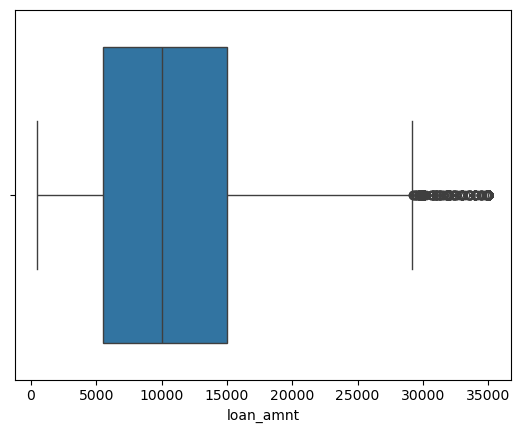

In [24]:
print(loan_df['loan_amnt'].describe())
sns.boxplot(x = loan_df['loan_amnt'])
plt.show()

***Not much difference in Mean and Median, So keeping all data***


- ***Funded Amount***

count   37497.00
mean    10861.26
std      7096.15
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64


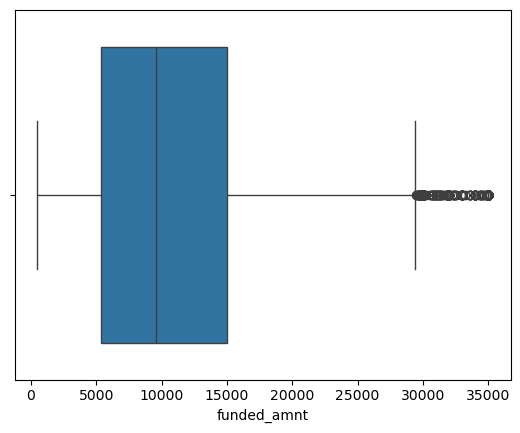

In [25]:
print(loan_df['funded_amnt'].describe())
sns.boxplot(x = loan_df['funded_amnt'])
plt.show()

In [26]:
loan_df.funded_amnt.describe()

count   37497.00
mean    10861.26
std      7096.15
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

***Not much difference in Mean and Median, So keeping all the data***

- ***Annual Income***

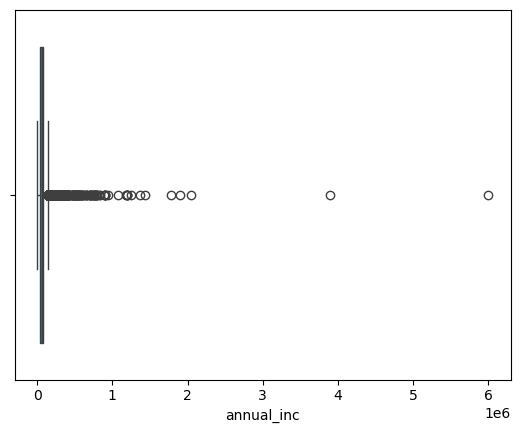

In [27]:
sns.boxplot(x = loan_df['annual_inc'])
plt.show()

In [28]:
loan_df.annual_inc.describe()

count     37497.00
mean      69436.53
std       64672.08
min        4000.00
25%       41000.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

##### Calculating Upper fence i.e upper whisker value using formula given below:<br>
#### $upper_fence = Q3 + 1.5(IQR)$

In [29]:
upper_fence = loan_df.annual_inc.quantile(0.75) + 1.5 * (loan_df.annual_inc.quantile(0.75) - loan_df.annual_inc.quantile(0.25))
upper_fence

146000.0

In [30]:
# Removing all the values Beyond upper fenece
loan_df = loan_df[loan_df['annual_inc'] <= upper_fence]

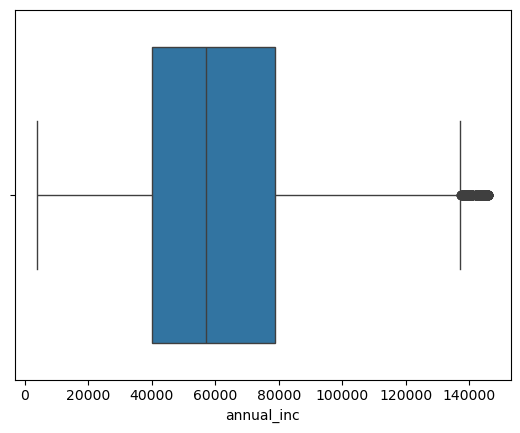

In [31]:
sns.boxplot(x = loan_df['annual_inc'])
plt.show()

***All Outliers are handled for annual income***

- ***Open Account***

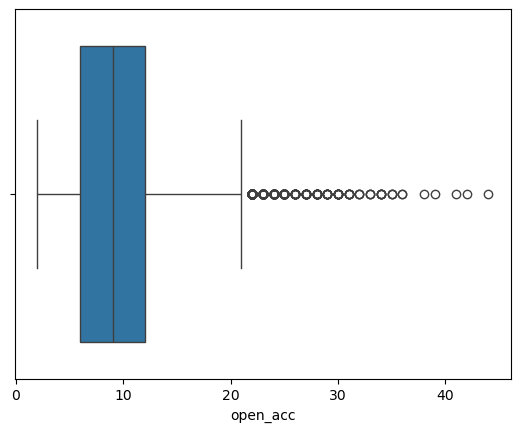

In [32]:
sns.boxplot(x = loan_df['open_acc'])
plt.show()

In [33]:
loan_df[loan_df['open_acc'] > 22]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc verification_status issue_d  loan_status             purpose addr_state   dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  total_pymnt
250         4000         4000    36     19.03       146.69     E        E2  10+ years       MORTGAGE    80000.00        Not Verified  Dec-11   Fully Paid            vacation         NC 20.59            1               2        30        0       22.60         56      4341.50
601        12375        12375    60     23.13       349.79     G        G2    5 years           RENT    40000.00        Not Verified  Dec-11  Charged Off               other         FL 20.88            0               0        27        0       22.50         31      8530.26
916         7200         7200    36     20.89       270.86     F        F1   < 1 year       MORTGAGE    88800.00            Verified  Dec-11  Charged Off  debt_consolidation         OH 20.46            0               3        34        0       57.50         61      6676.85
1081       12000        12000    60     20.89       323.90     F        F1    3 years       MORTGAGE   100000.00        Not Verified  Dec-11   Fully Paid  debt_consolidation         CA 13.76            0               0        25        1       68.30         52     16264.59
1506       31300        31300    60     20.30       834.50     E        E5  10+ years       MORTGAGE    75000.00            Verified  Dec-11   Fully Paid  debt_consolidation         MO 21.84            0               1        30        0       43.90         63     33386.66
...          ...          ...   ...       ...          ...   ...       ...        ...            ...         ...                 ...     ...          ...                 ...        ...   ...          ...             ...       ...      ...         ...        ...          ...
39454      18000        18000    36      9.33       575.17     B        B3  10+ years            OWN   102000.00        Not Verified  Jan-08   Fully Paid  debt_consolidation         TX 16.95            0               2        30        0        8.20         63     20705.85
39538       6500         6500    36      7.75       202.94     A        A3  10+ years            OWN    48000.00        Not Verified  Dec-07   Fully Paid  debt_consolidation         NC 13.53            0               3        24        0        8.90         43      7305.79
39579      15450        15450    36     10.91       505.16     C        C3    7 years           RENT   120000.00        Not Verified  Nov-07  Charged Off  debt_consolidation         WA 16.97            0               3        27        0       44.50         39     12699.13
39588       3000         3000    36     10.28        97.20     C        C1   < 1 year           RENT    38000.00        Not Verified  Oct-07   Fully Paid               other         LA 19.93            0               0        23        0       96.50         29      3499.05
39633      10250        10250    36     14.38       352.22     E        E4    4 years           RENT    72000.00        Not Verified  Oct-07   Fully Paid  debt_consolidation         FL 17.83            0               1        28        0        6.50         32     11444.37

[304 rows x 23 columns]

***Earliest credit line of all these customers are almost 10 Years+, so they must could have 20+ Open Account***

- ***Interest Rate***

<Axes: xlabel='int_rate'>

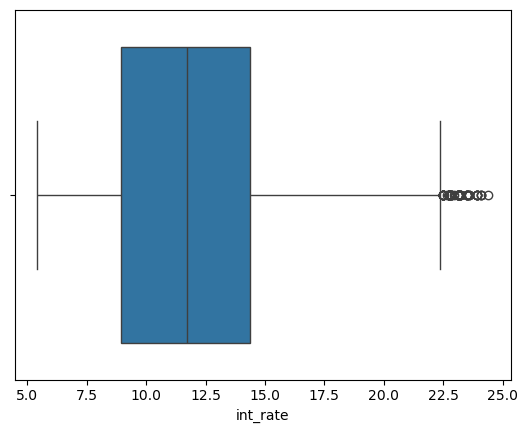

In [34]:
sns.boxplot(x = loan_df['int_rate'])

In [35]:
loan_df[loan_df['int_rate'] > 22.5].head(10)

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade emp_length home_ownership  annual_inc verification_status issue_d  loan_status             purpose addr_state   dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  total_pymnt
223       24250        18100    60     23.91       519.76     G        G4    7 years       MORTGAGE   120000.00            Verified  Dec-11   Fully Paid  debt_consolidation         AZ 12.96            0               3         7        0       99.00         20     22206.82
601       12375        12375    60     23.13       349.79     G        G2    5 years           RENT    40000.00        Not Verified  Dec-11  Charged Off               other         FL 20.88            0               0        27        0       22.50         31      8530.26
616       22400        22400    60     22.74       628.13     G        G1    6 years           RENT    85000.00        Not Verified  Dec-11  Charged Off         credit_card         NY  7.02            2               1        14        0       58.70         16     26376.52
733       24925        24925    60     23.91       715.75     G        G4    4 years           RENT    60000.00            Verified  Dec-11   Fully Paid         credit_card         FL 17.74            0               2        19        0       98.90         26     37823.37
1156      29100        29100    60     23.91       835.63     G        G4   < 1 year           RENT    95000.00     Source Verified  Dec-11   Fully Paid  debt_consolidation         NY 16.41            1               0         4        0       99.70         22     40059.17
1619      24250        24250    60     24.11       699.18     G        G5        NaN       MORTGAGE   108000.00            Verified  Dec-11   Fully Paid         credit_card         LA 12.27            0               2         8        0       99.00         28     35626.82
1799      25000        25000    60     24.11       720.80     G        G5    4 years       MORTGAGE   145000.00            Verified  Dec-11   Fully Paid         credit_card         TX  8.30            0               0         8        0       97.70         31     31602.40
1839      35000        35000    60     22.74       981.45     G        G1    4 years           RENT   105000.00            Verified  Dec-11   Fully Paid  debt_consolidation         TX 16.94            0               0        10        0       91.20         20     37616.61
2075      21575        21575    60     23.91       619.55     G        G4  10+ years           RENT    54480.00     Source Verified  Dec-11   Fully Paid  debt_consolidation         WA 18.50            0               1         7        0       98.70         21     26082.91
2447      26300        26300    60     23.13       743.38     G        G2   < 1 year       MORTGAGE    65000.00     Source Verified  Dec-11  Charged Off         credit_card         OH 15.06            0               0         9        0       90.20         26     16354.36

***Most of the record having grade G which means higher risk thats why higher interest rate so keeping all these records***

- ***Revolving Utilization***

<Axes: xlabel='revol_util'>

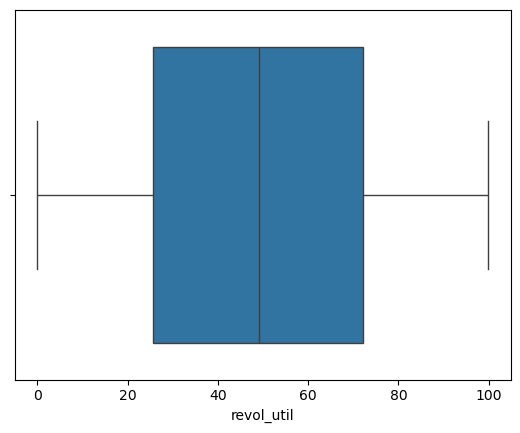

In [36]:
sns.boxplot(x = loan_df['revol_util'])

***Now outliers are handled so moving forward with EDA***

### Creating New Columns

#### Converting Issue date to date-time and creating two new columns year and month.

In [37]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [38]:
# Creating year and month columns
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

In [39]:
# Creating new column Profit 
loan_df['profit'] = loan_df['total_pymnt'] - loan_df['funded_amnt']

In [40]:
# Define a mapping of states to regions
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 'SC': 'South', 'VA': 'South', 'DC': 'South', 'WV': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}

# Map the states to regions
loan_df['region'] = loan_df['addr_state'].map(state_to_region)

#### Creating Binned Variables for some numerical data

In [41]:
loan_df['interest_rate_scale'] = pd.cut(loan_df['int_rate'], bins=[5,10,15,20,25], precision=0,labels=['5%-10%', '10%-15%', '15%-20%', '20%-25%'])

loan_df['revolving_utilization_scale'] = pd.cut(loan_df['revol_util'], bins=[0,20,40,60,80,100],precision=0,labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

loan_df['dti_scale'] = pd.cut(loan_df['dti'], bins=[0,5,10,15,20,25,30],precision=0,labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

loan_df['funded_amnt_scale'] = pd.cut(loan_df['funded_amnt'], bins=[0,10000,20000,30000,40000],precision=0,labels=['0-10k', '10k-20k', '20k-30k', '30k-40k'])

loan_df['loan_amnt_scale'] = pd.cut(loan_df['loan_amnt'], bins=[0,10000,20000,30000,40000],precision=0,labels=['0-10k', '10k-20k', '20k-30k', '30k-40k'])

loan_df['open_accounts_scale'] = pd.cut(loan_df['open_acc'], bins=[0,10,20,30,40,50],precision=0,labels=['0-10', '10-20', '20-30', '30-40', '40-50'])

loan_df['total_accounts_scale'] = pd.cut(loan_df['total_acc'], bins=[0,15,30,45,60,75,90],precision=0,labels=['0-15', '15-30', '30-45', '45-60', '60-75', '75-90'])

loan_df['annual_income_scale'] = pd.cut(loan_df['annual_inc'], bins=[1000,30000,60000,90000,120000,150000],precision=0,labels=['1k-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k'])

loan_df['installment_scale'] = pd.cut(loan_df['installment'], bins=[0, 300, 600, 900, 1306],precision=0,labels=['0-300', '300-600', '600-900', '900-1300'])


In [42]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'total_pymnt', 'year', 'month', 'profit', 'region', 'interest_rate_scale', 'revolving_utilization_scale', 'dti_scale', 'funded_amnt_scale', 'loan_amnt_scale', 'open_accounts_scale', 'total_accounts_scale', 'annual_income_scale', 'installment_scale'], dtype='object')

In [43]:
loan_df['installment'].describe()

count   35768.00
mean      314.89
std       200.18
min        15.69
25%       164.85
50%       273.61
75%       412.18
max      1305.19
Name: installment, dtype: float64

# 4. Exploratory Data Analysis(EDA)

## 4.1 Univariate Analysis

##### Categoriacal Data:
       'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose'

### Categorical Variables

- ***Loan Status***

loan_status
Fully Paid     30576
Charged Off     5192
Name: count, dtype: int64


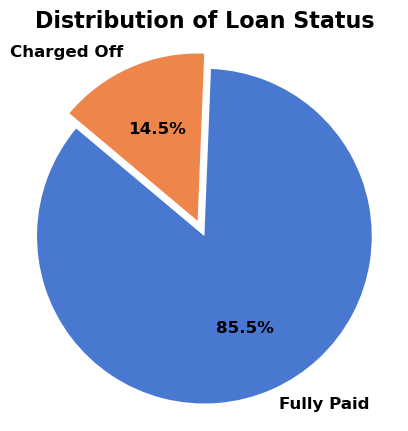

In [44]:
print(loan_df['loan_status'].value_counts())


plt.figure(figsize=(5, 5))
labels = ['Fully Paid', 'Charged Off']
explode = (0, 0.1)  
colors = sns.color_palette('muted')
plt.pie(loan_df['loan_status'].value_counts(), explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=140, textprops={'fontweight': 'bold', 'fontsize': 12})
plt.axis('equal')


plt.title('Distribution of Loan Status', fontsize=16, fontweight='bold')
# Show the chart
plt.show()

#### Inference:
***Defaulted loans are low in numbers compared to fully paid ones. There are 85.5% who have fully paid their loans, while 14.5% are defaulters.***

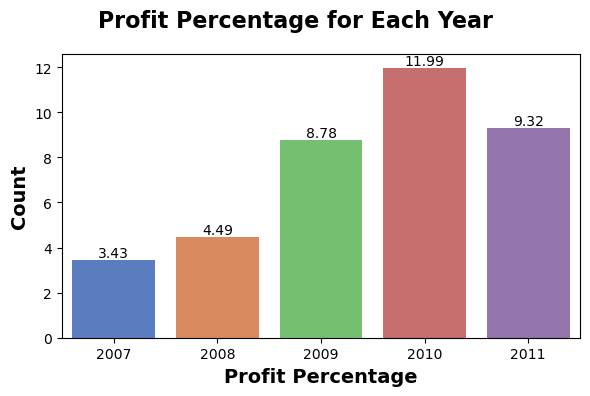

In [45]:
total_profit = loan_df.groupby('year')['profit'].sum()
total_funded = loan_df.groupby('year')['funded_amnt'].sum()
profit_percentage = ((total_profit / total_funded) * 100).reset_index(name='Profit %')

# Setting up the subplots
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Profit Percentage for Each Year', fontsize=16, fontweight='bold')

# Plotting the barplot
sns.barplot(x='year', y='Profit %', data=profit_percentage, ax=ax, palette="muted")

ax.set_xlabel('Profit Percentage', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')

for p in ax.patches:
    height = round(p.get_height(),2)
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
    ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black', fontsize=10)
fig.tight_layout()
plt.show()

In [46]:
def count_plot(data, column, title, color_palette='muted', rotate=False, hue=None, count=True, annotate=True):
    """
    Plots count distribution of a specified column in the given DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to visualize
    - title: str, the title for the plot
    - color_palette: str, the name of the seaborn color palette to use for coloring plots (default: 'viridis')
    """
    if count==True:
        # Print value counts of the column
        print(data[column].value_counts())

    # Setting up the subplots
    fig, ax = plt.subplots(figsize=(6, 5))

    # Formatting Figure
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # Plot countplot
    sns.countplot(data=data, x=column, palette=color_palette, ax=ax, hue=hue, width=0.5, dodge=False)

    ax.set_xlabel(column, fontsize=14, fontweight='bold')
    ax.set_ylabel('Count', fontsize=14, fontweight='bold')

    # Customize ticks and labels
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # Add annotations
    if annotate == True:
        for p in ax.patches:
            height = int(p.get_height())
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black', fontsize=10)

    
    #Rotate x-axis labels by 45 degrees
    if rotate == True:
        plt.xticks(rotation=45, ha='right')
    
        
    # Format y-axis labels
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x * 1e-3)}K'))

    fig.tight_layout()
    plt.show()

- ***Year***

year
2011    18833
2010    10730
2009     4487
2008     1487
2007      231
Name: count, dtype: int64


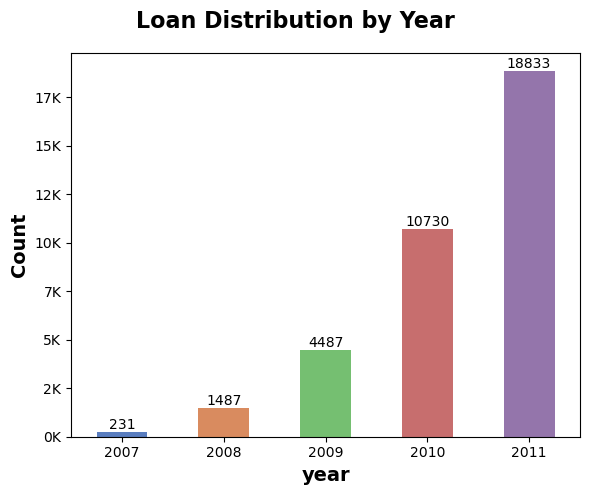

In [47]:
title = 'Loan Distribution by Year'
count_plot(loan_df, 'year', title)

- ***Region***

region
South        11740
West         10304
Northeast     8662
Midwest       5062
Name: count, dtype: int64


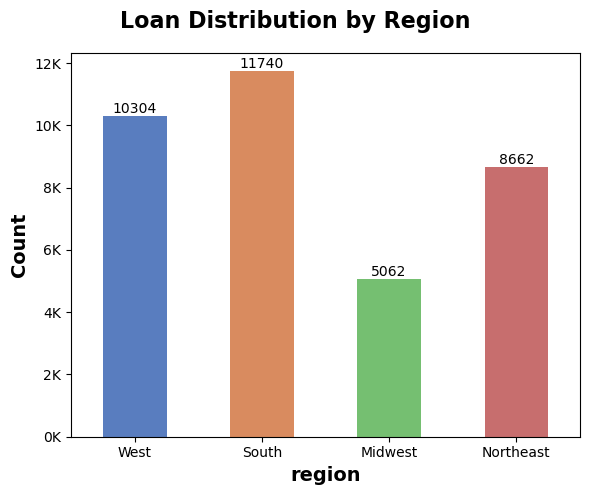

In [48]:
title = 'Loan Distribution by Region'
count_plot(loan_df, 'region', title)

- ***Grade***

grade
B    10841
A     9309
C     7333
D     4740
E     2413
F      868
G      264
Name: count, dtype: int64


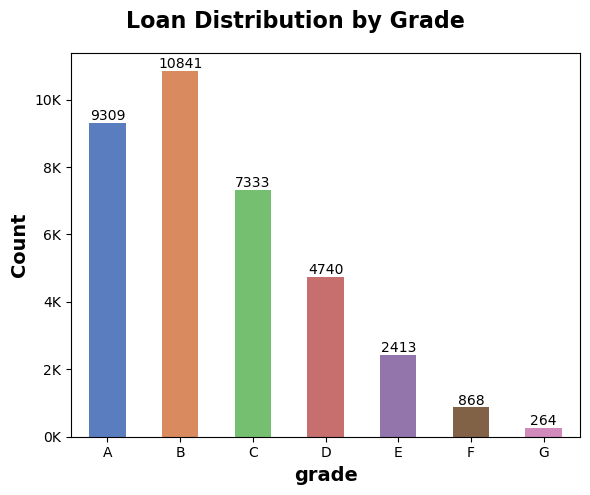

In [49]:
title = 'Loan Distribution by Grade'
count_plot(loan_df, 'grade', title)

- ***Sub-Grade***

sub_grade
A4    2680
B3    2597
A5    2537
B5    2449
B4    2295
C1    1929
B2    1851
C2    1816
A3    1687
B1    1649
A2    1391
C3    1390
D2    1194
C4    1127
C5    1071
D3    1045
A1    1014
D1     873
D4     857
D5     771
E1     669
E2     558
E3     460
E4     391
E5     335
F1     271
F2     210
F3     155
F4     135
F5      97
G1      87
G2      68
G4      45
G3      41
G5      23
Name: count, dtype: int64


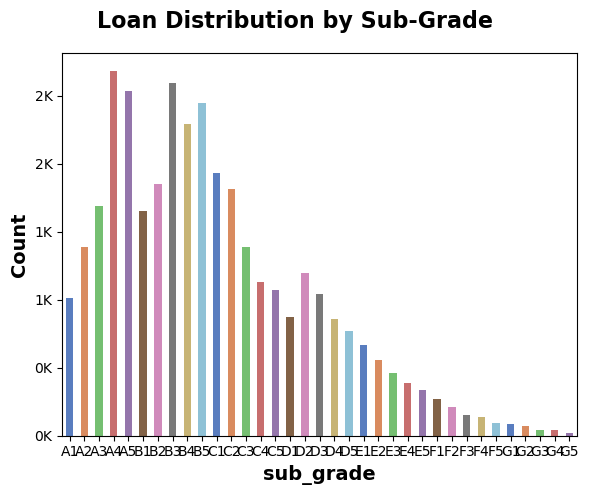

In [50]:
title = 'Loan Distribution by Sub-Grade'
count_plot(loan_df, 'sub_grade', title, annotate=False)

- ***Home Ownership***

home_ownership
RENT        17635
MORTGAGE    15385
OWN          2654
OTHER          91
NONE            3
Name: count, dtype: int64


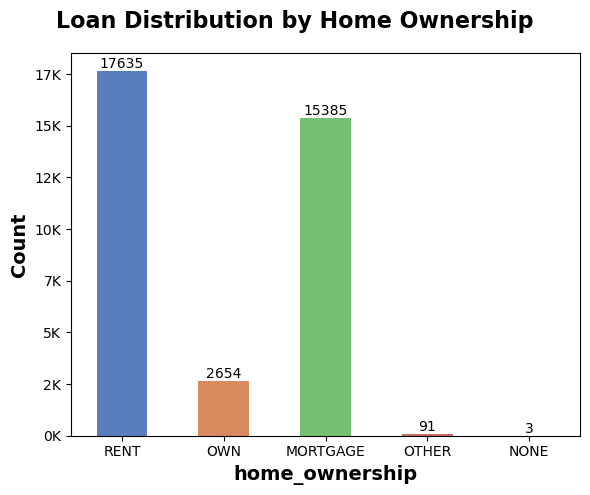

In [51]:
title = 'Loan Distribution by Home Ownership'
count_plot(loan_df, 'home_ownership', title)

- ***Employment Length***

emp_length
10+ years    7938
< 1 year     4340
2 years      4115
3 years      3838
4 years      3207
5 years      3055
6 years      2078
7 years      1644
8 years      1346
9 years      1157
Name: count, dtype: int64


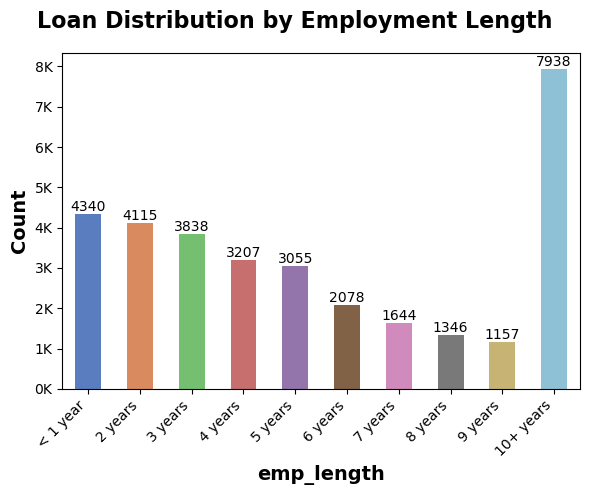

In [52]:
title = 'Loan Distribution by Employment Length'
count_plot(loan_df, 'emp_length', title, rotate=True)

- ***Verification Status***

verification_status
Not Verified       15883
Verified           10874
Source Verified     9011
Name: count, dtype: int64


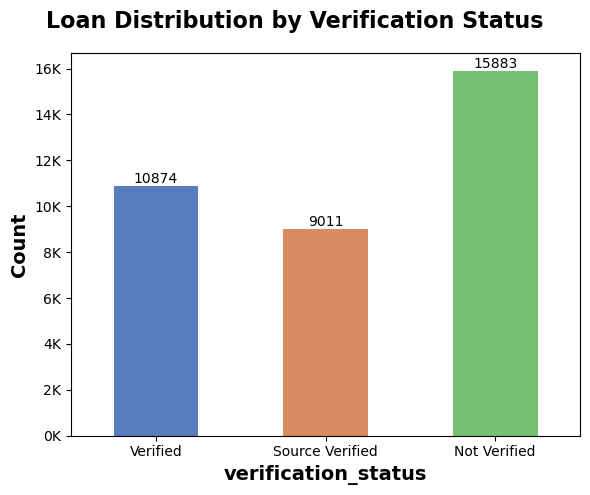

In [53]:
title = 'Loan Distribution by Verification Status'
count_plot(loan_df, 'verification_status', title)

- ***Terms***

term
36    27010
60     8758
Name: count, dtype: int64


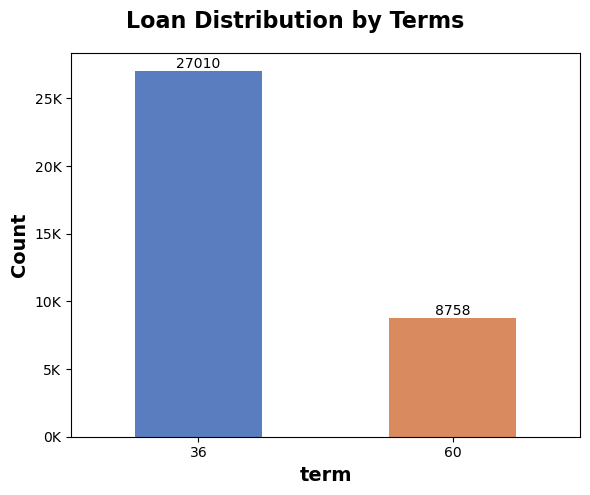

In [54]:
title = 'Loan Distribution by Terms'
count_plot(loan_df, 'term', title)

- ***Purpose***

purpose
debt_consolidation    16996
credit_card            4679
other                  3548
home_improvement       2493
major_purchase         1979
small_business         1587
car                    1404
wedding                 884
medical                 619
moving                  526
vacation                338
house                   325
educational             303
renewable_energy         87
Name: count, dtype: int64


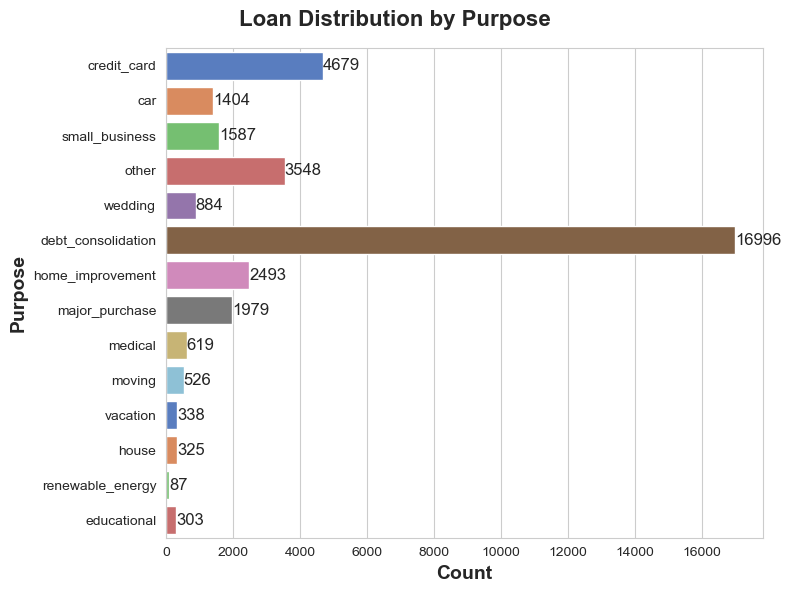

In [55]:
# purpose
print((loan_df['purpose'].value_counts()))

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Setting up the subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Formatting Figure
fig.suptitle('Loan Distribution by Purpose', fontsize=16, fontweight='bold')

ax = sns.countplot(y='purpose', data=loan_df, palette='muted')
# Add title and labels
ax.set_ylabel('Purpose', fontsize=14, fontweight='bold')
ax.set_xlabel('Count', fontsize=14, fontweight='bold')

# Add counts on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

plt.tight_layout()
plt.show()

- ***Public Records***

pub_rec
0    33864
1     1852
2       44
3        6
4        2
Name: count, dtype: int64


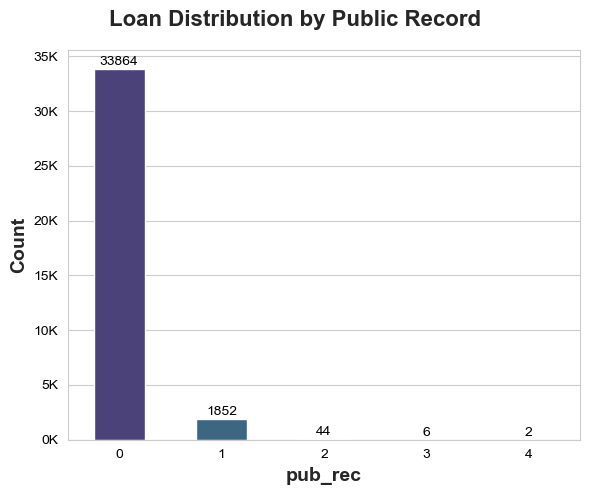

In [56]:
title = 'Loan Distribution by Public Record'
count_plot(loan_df, 'pub_rec', title, color_palette='viridis')

- ***Delinqent***

delinq_2yrs
0     31898
1      2981
2       599
3       197
4        56
5        19
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64


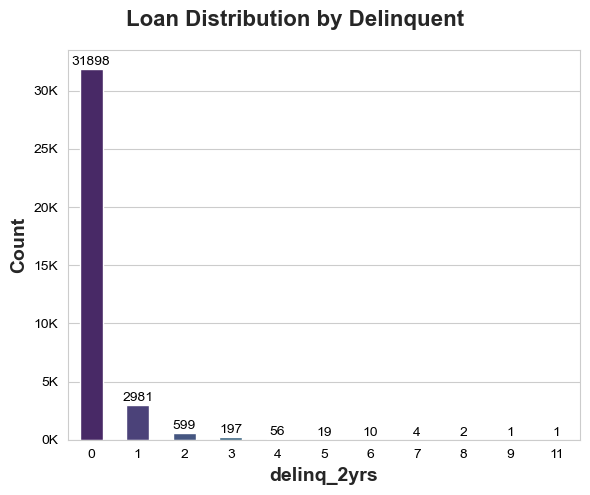

In [57]:
title = 'Loan Distribution by Delinquent'
count_plot(loan_df, 'delinq_2yrs', title, color_palette='viridis')

### Numerical Variables

##### Numerical Data:
        'loan_amnt','funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'total_acc', 'revol_util'
       

In [58]:
def plot_box_hist_kde(data, column, title, color='skyblue'):
    """
    Creates subplots with boxplot and histogram + KDE for a specified column in the given DataFrame.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to visualize
    - title: str, the title for the plot
    - color: str, the color to use for plots (default: 'skyblue')
    """
    
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Formatting Figure
    fig.suptitle(title, fontsize=16, fontweight='bold')
   

    # Boxplot on the first subplot
    sns.boxplot(x=data[column], ax=axes[0], color=color)
    axes[0].set_title(f'Boxplot of {column}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel(column, fontsize=12, color='darkred')
    axes[0].set_ylabel('')  # Remove y-label for boxplot

    # Histogram with KDE on the second subplot
    sns.histplot(data[column], kde=True, bins=30, ax=axes[1], color=color)  # Set histogram color
    axes[1].set_title(f'Histogram of {column} with KDE', fontsize=14, fontweight='bold')
    axes[1].set_xlabel(column, fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)

    # Customize ticks and labels
    axes[0].tick_params(axis='x')
    axes[0].tick_params(axis='y')
    axes[1].tick_params(axis='x')
    axes[1].tick_params(axis='y')

    # Adjust layout
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [59]:
# Calculating statistical values for all numerical columns
loan_df.describe()

loan_amnt  funded_amnt     term  int_rate  installment  annual_inc                        issue_d      dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  total_pymnt     year    month    profit
count   35768.00     35768.00 35768.00  35768.00     35768.00    35768.00                          35768 35768.00     35768.00        35768.00  35768.00 35768.00    35768.00   35768.00     35768.00 35768.00 35768.00  35768.00
mean    10783.48     10533.80    41.88     11.92       314.89    61812.27  2010-10-21 22:36:59.100872448    13.45         0.15            0.87      9.20     0.05       48.83      21.71     11568.42  2010.30     7.11   1034.62
min       500.00       500.00    36.00      5.42        15.69     4000.00            2007-06-01 00:00:00     0.00         0.00            0.00      2.00     0.00        0.00       2.00         0.00  2007.00     1.00 -35000.00
25%      5100.00      5000.00    36.00      8.94       164.85    40000.00            2010-05-01 00:00:00     8.37         0.00            0.00      6.00     0.00       25.50      13.00      5482.82  2010.00     4.00    414.37
50%      9500.00      9175.00    36.00     11.71       273.61    57000.00            2011-01-01 00:00:00    13.59         0.00            1.00      9.00     0.00       49.20      20.00      9495.65  2011.00     7.00   1063.25
75%     15000.00     14400.00    36.00     14.35       412.18    78900.75            2011-07-01 00:00:00    18.70         0.00            1.00     12.00     0.00       72.20      28.00     15625.82  2011.00    10.00   2287.73
max     35000.00     35000.00    60.00     24.40      1305.19   146000.00            2011-12-01 00:00:00    29.99        11.00            8.00     44.00     4.00       99.90      90.00     58563.68  2011.00    12.00  23563.68
std      7075.60      6828.43    10.32      3.66       200.18    28186.14                            NaN     6.65         0.49            1.06      4.35     0.24       28.26      11.23      8454.62     0.89     3.41   3864.49

- ***Loan Amount***

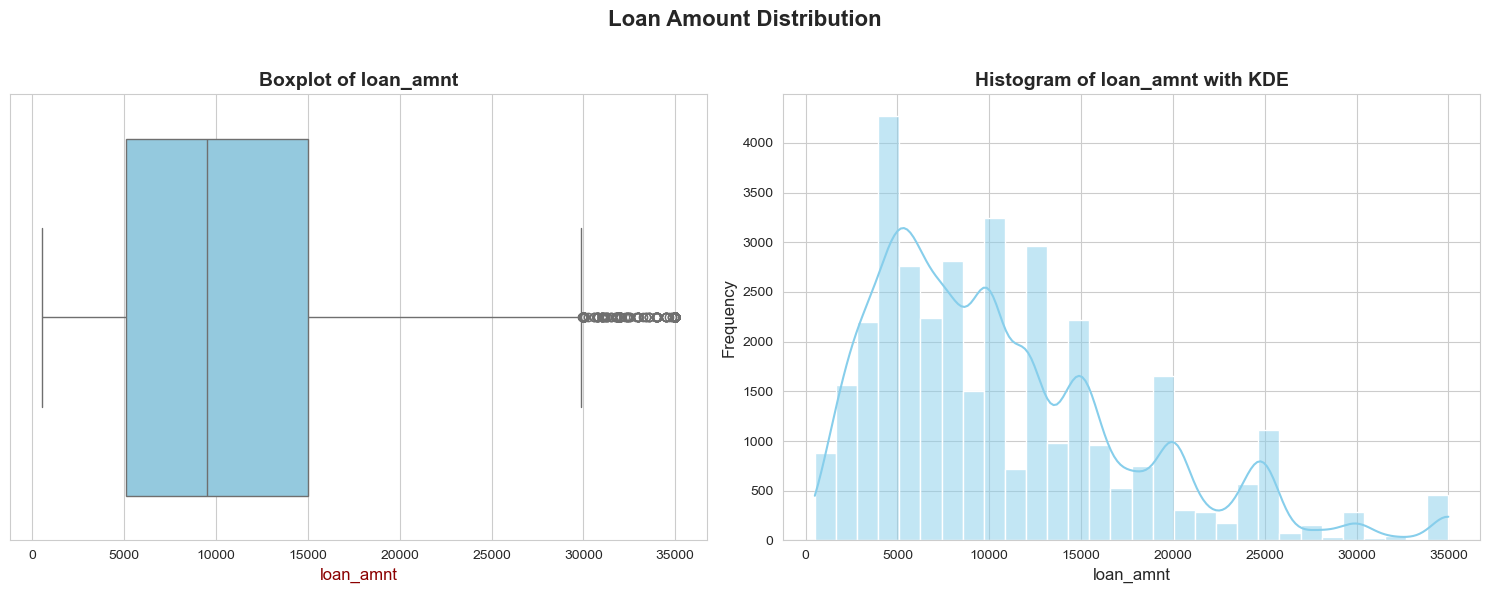

In [60]:
title = 'Loan Amount Distribution'
plot_box_hist_kde(loan_df, 'loan_amnt', title)

- ***Installment***

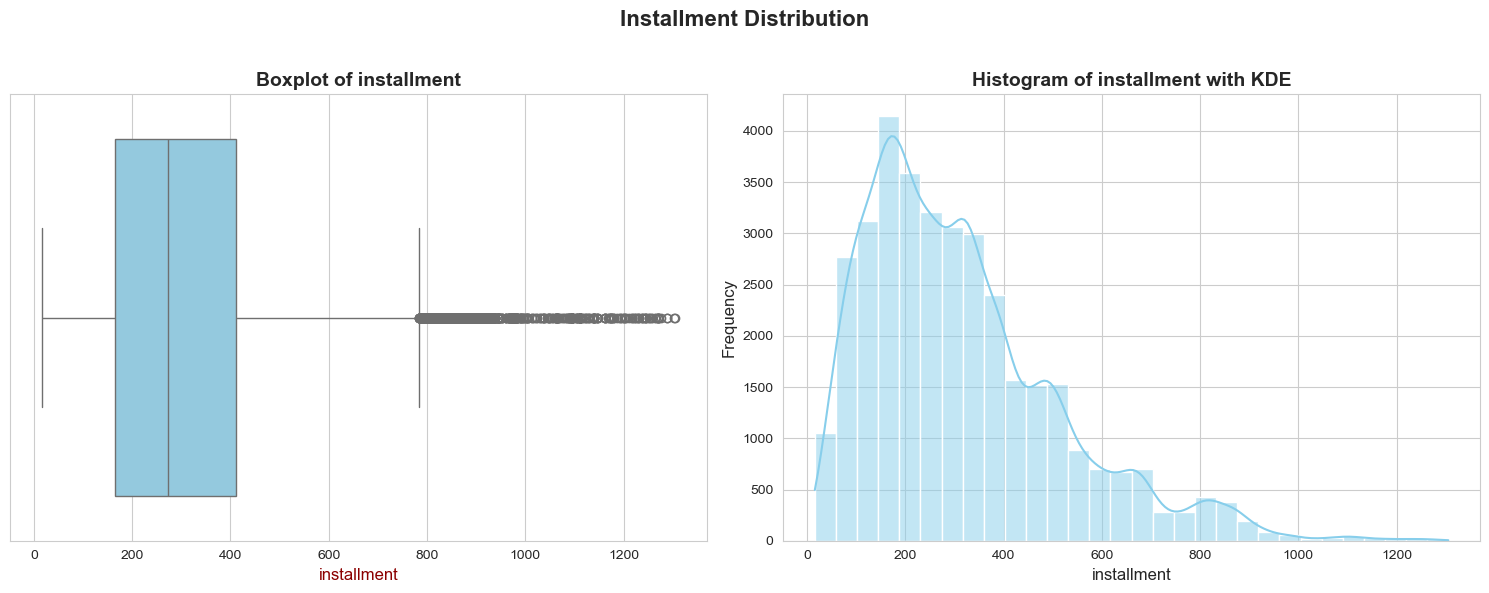

In [61]:
title = 'Installment Distribution'
plot_box_hist_kde(loan_df, 'installment', title)

- ***Inquries in Last 6 months***

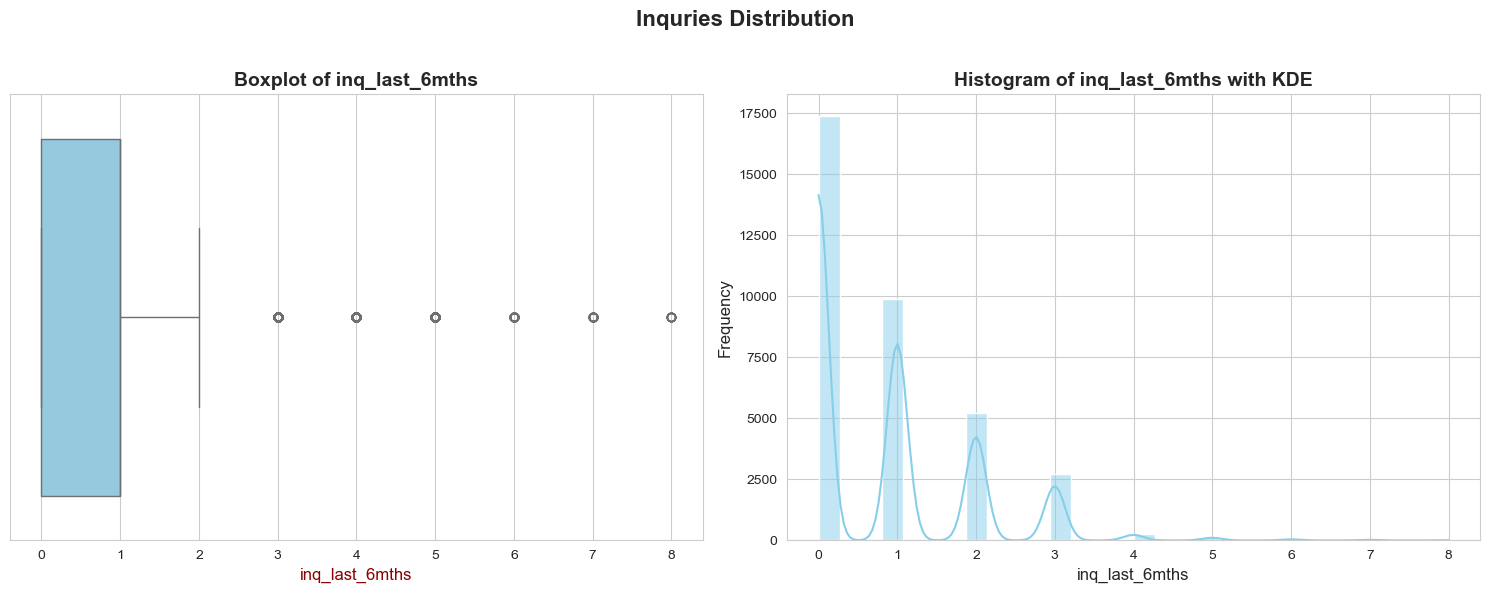

In [62]:
title = 'Inquries Distribution'
plot_box_hist_kde(loan_df, 'inq_last_6mths', title)

- ***Interest Rate***

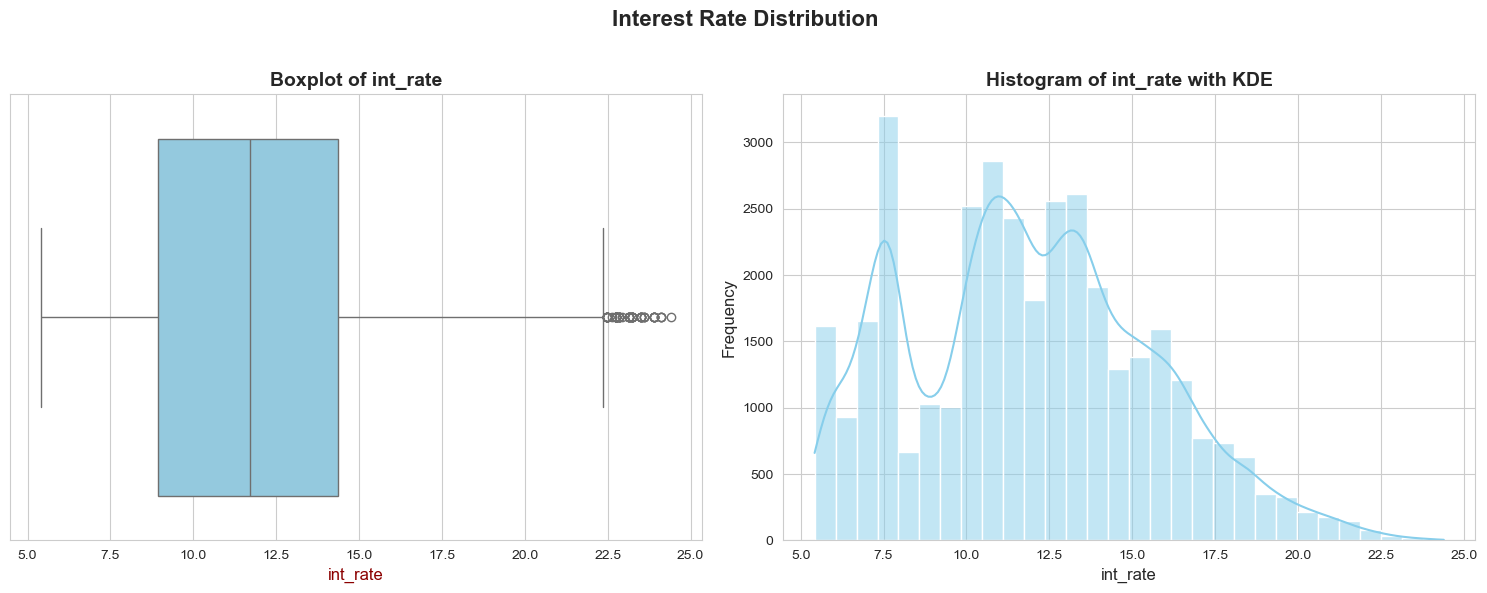

In [63]:
title = 'Interest Rate Distribution'
plot_box_hist_kde(loan_df, 'int_rate', title)

- ***Annual Income***

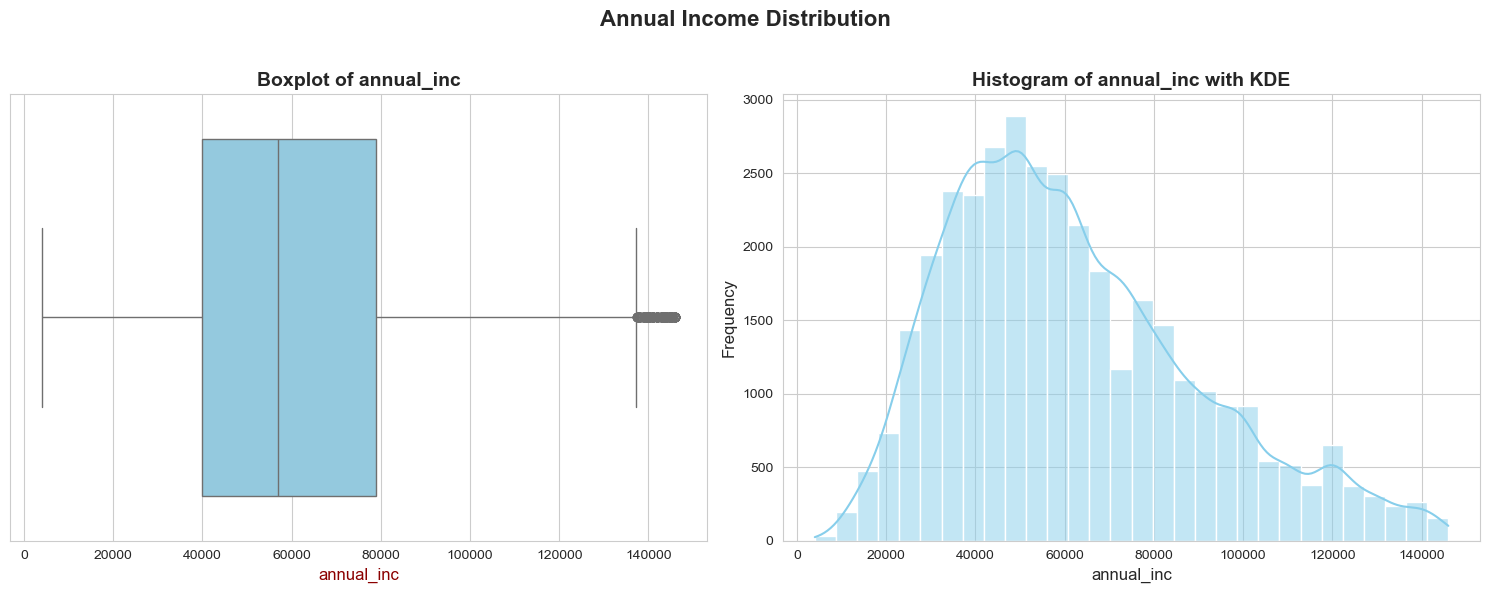

In [64]:
title = 'Annual Income Distribution'
plot_box_hist_kde(loan_df, 'annual_inc', title)

- ***Revolving Utilization***

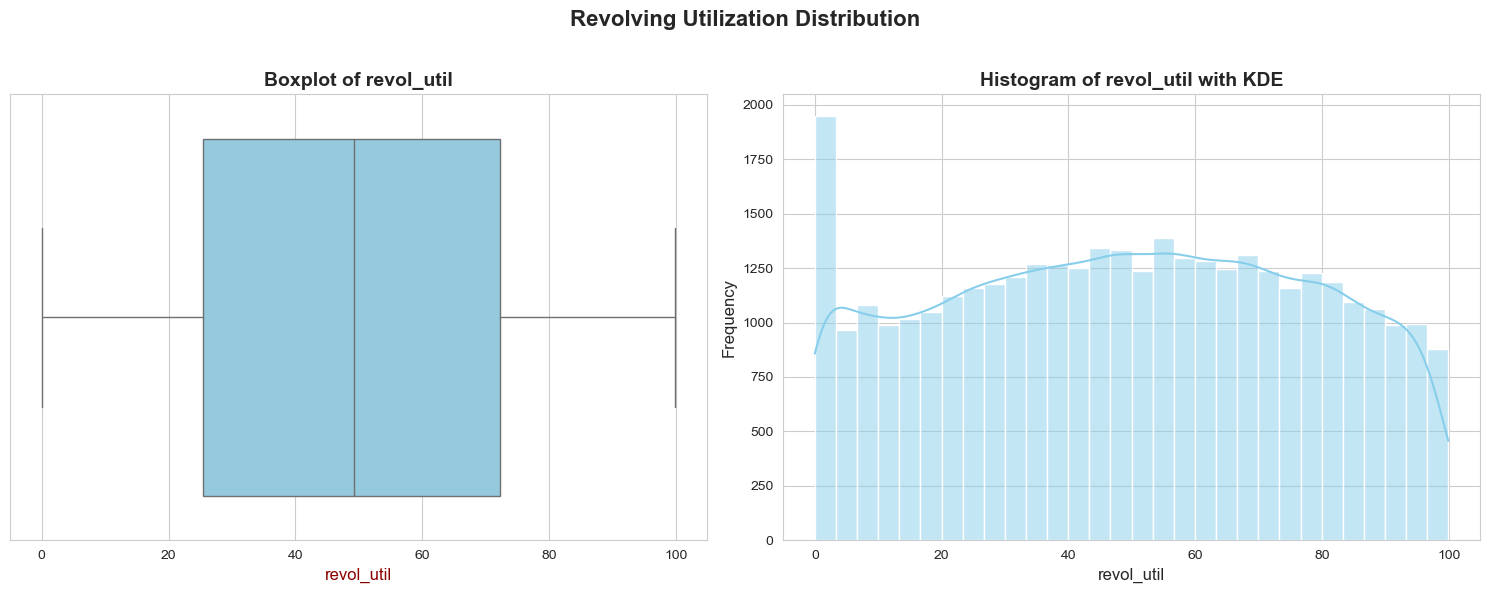

In [65]:
title = 'Revolving Utilization Distribution'
plot_box_hist_kde(loan_df, 'revol_util', title)

- ***Open Account***

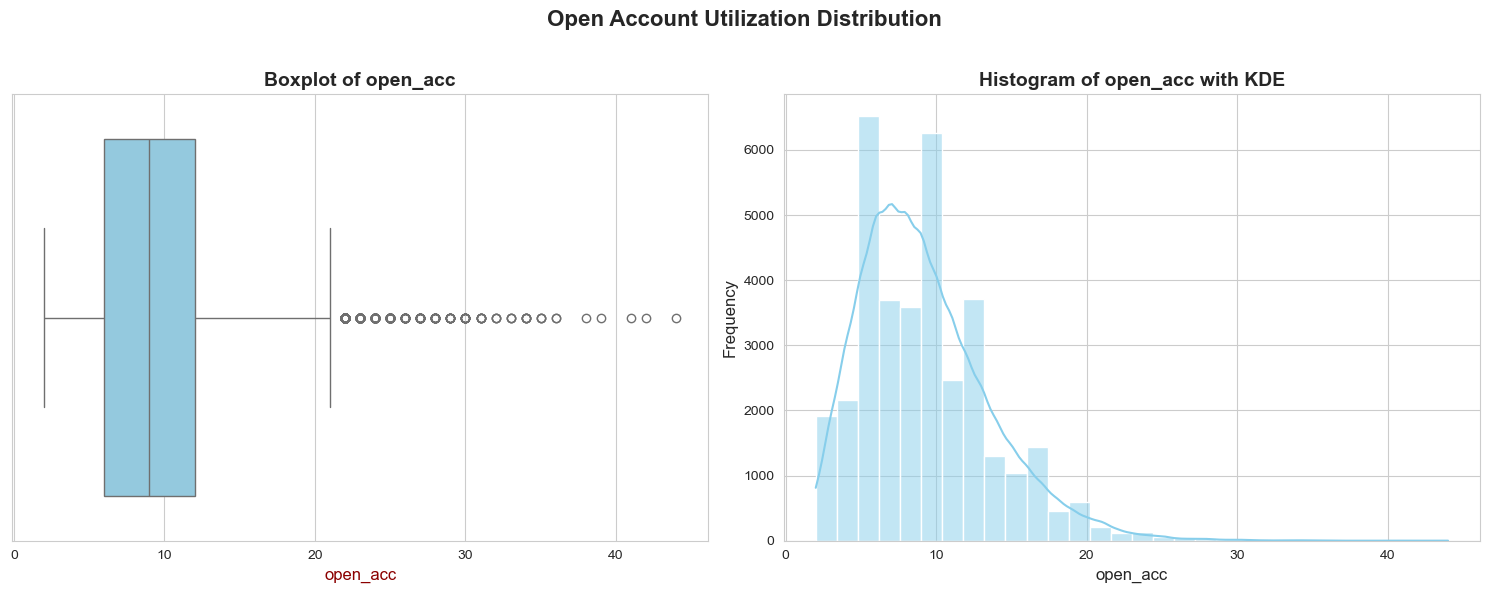

In [66]:
title = 'Open Account Utilization Distribution'
plot_box_hist_kde(loan_df, 'open_acc', title)

- ***Total Account***

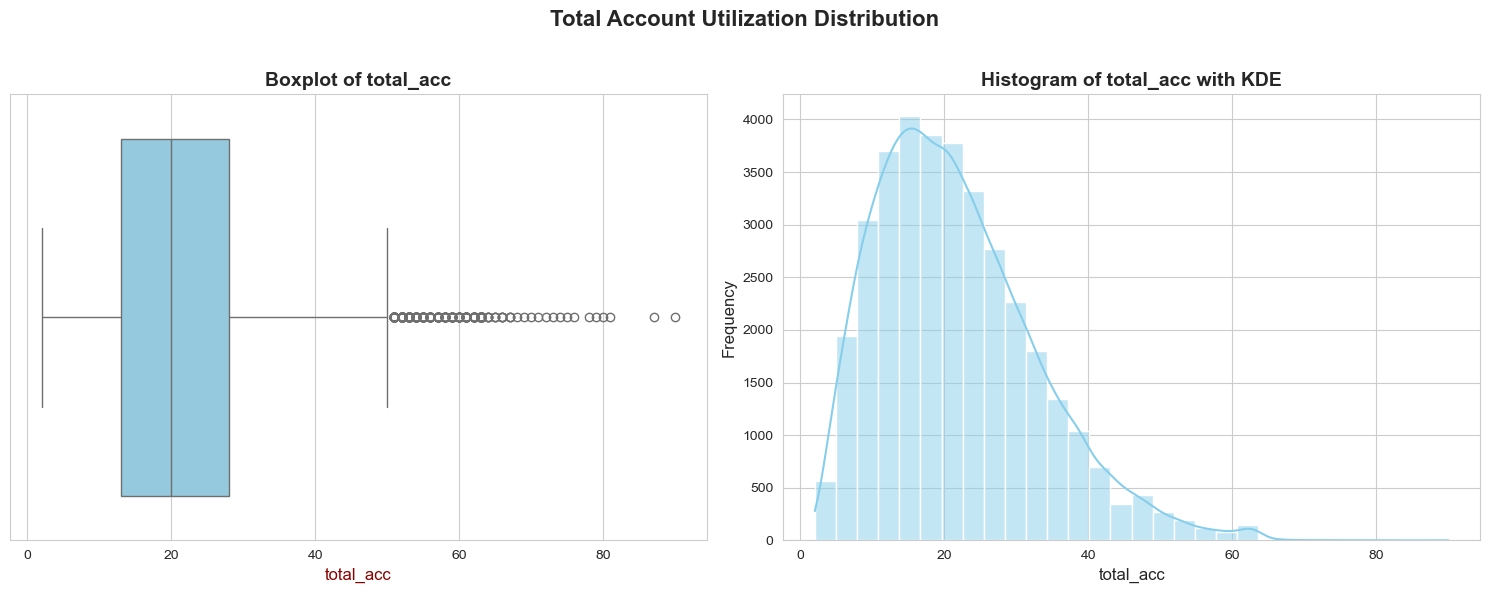

In [67]:
title = 'Total Account Utilization Distribution'
plot_box_hist_kde(loan_df, 'total_acc', title)

- ***Debt-to-Income Ratio***

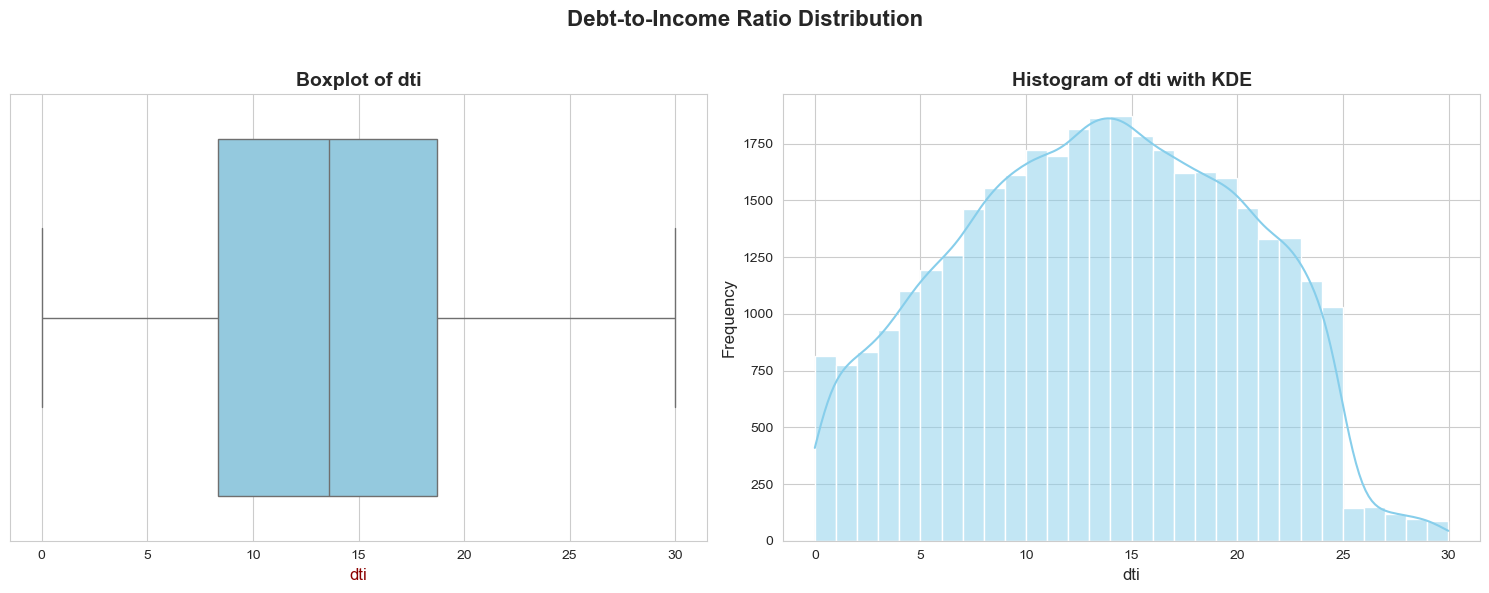

In [68]:
title = 'Debt-to-Income Ratio Distribution'
plot_box_hist_kde(loan_df, 'dti', title)

## 4.2 Segmented Univariate Analysis

In [69]:
def calculate_proportions(data, group_column, target_column):
    """
    Calculates and displays the proportions of target_column categories within each group_column category.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - group_column: str, the name of the column to group by
    - target_column: str, the name of the target column to calculate proportions for

    Returns:
    - proportions_loan_df: pd.DataFrame, the DataFrame containing the calculated proportions
    """
    # Calculate counts
    counts = data.groupby([group_column, target_column]).size().unstack().fillna(0)

    # Calculate proportions
    proportions = counts.div(counts.sum(axis=1), axis=0)

    print(f'The relative frequency of each {target_column} within each {group_column}\n{proportions}')

    return proportions

def plot_proportions(proportions, group_column, target_column, title, rotate=False):
    """
    Plots the proportions of target_column categories within each group_column category.

    Parameters:
    - proportions: pd.DataFrame, the DataFrame containing the calculated proportions
    - group_column: str, the name of the group column
    - target_column: str, the name of the target column
    - title: str, the title of the plot
    - rotate: bool, whether to rotate the x-axis labels by 45 degrees
    """
    
    # Reset index to use in plotting
    proportions.reset_index(inplace=True)
    melted = pd.melt(proportions, id_vars=group_column, value_name='Proportion')

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Formatting Figure
    fig.suptitle(title, fontsize=16, fontweight='bold')

    ax = sns.barplot(x=group_column, y='Proportion', hue=target_column, data=melted, palette='muted')
    ax.set_xlabel(group_column, fontsize=14, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=14, fontweight='bold')
    
    # Customize ticks and labels
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

    # Add annotations
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

    #Rotate x-axis labels by 45 degrees
    if rotate == True:
        plt.xticks(rotation=45, ha='right')

    # Place the legend outside the plot
    plt.legend(title=target_column, title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    #plt.legend(title=target_column, title_fontsize='13', fontsize='11')
    plt.tight_layout()
    plt.show()

- ***Year vs loan status***

The relative frequency of each loan_status within each year
loan_status  Charged Off  Fully Paid
year                                
2007                0.18        0.82
2008                0.16        0.84
2009                0.13        0.87
2010                0.13        0.87
2011                0.16        0.84


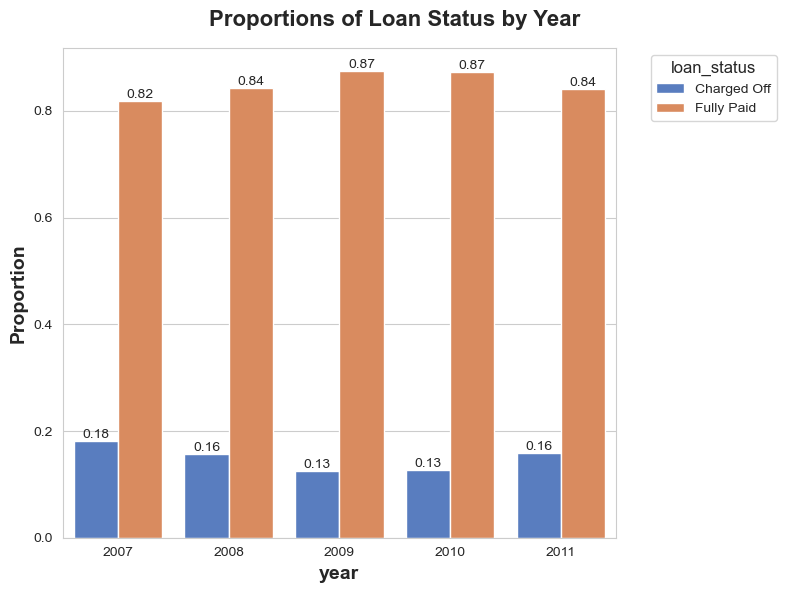

In [70]:
proportions = calculate_proportions(loan_df, 'year', 'loan_status')
plot_proportions(proportions, 'year', 'loan_status', 'Proportions of Loan Status by Year')

- ***Grade***

The relative frequency of each loan_status within each grade
loan_status  Charged Off  Fully Paid
grade                               
A                   0.06        0.94
B                   0.12        0.88
C                   0.17        0.83
D                   0.22        0.78
E                   0.27        0.73
F                   0.32        0.68
G                   0.35        0.65


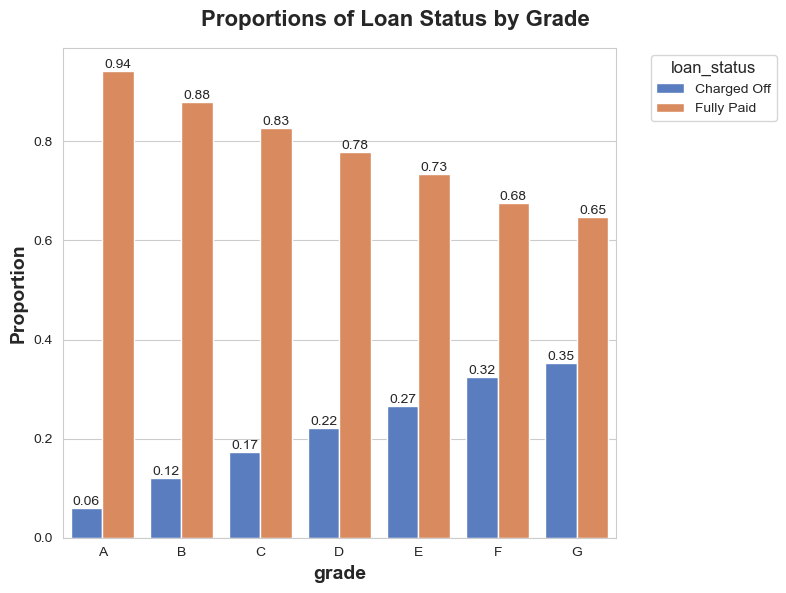

In [71]:
proportions = calculate_proportions(loan_df, 'grade', 'loan_status')
plot_proportions(proportions, 'grade', 'loan_status', 'Proportions of Loan Status by Grade')

- ***Home Ownership vs Loan Status***

The relative frequency of each loan_status within each home_ownership
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               0.14        0.86
NONE                   0.00        1.00
OTHER                  0.19        0.81
OWN                    0.15        0.85
RENT                   0.15        0.85


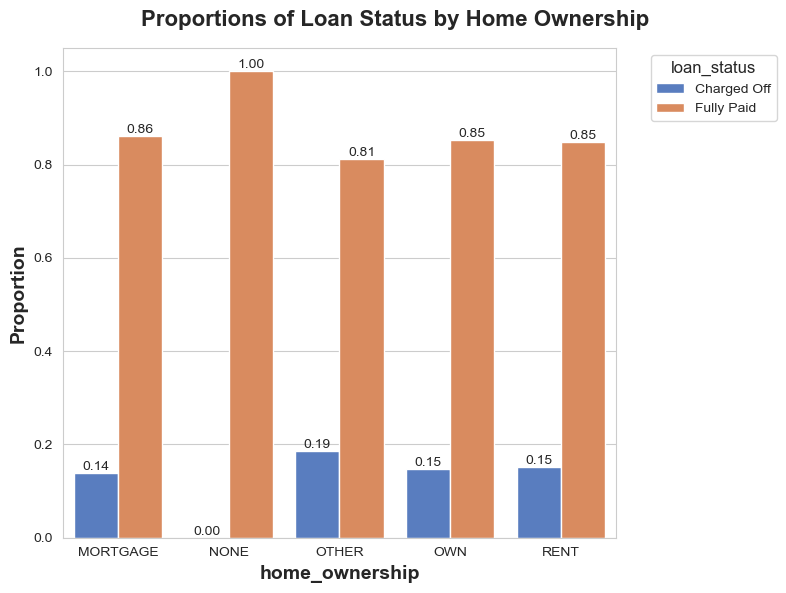

In [72]:
proportions = calculate_proportions(loan_df, 'home_ownership', 'loan_status')
plot_proportions(proportions, 'home_ownership', 'loan_status', 'Proportions of Loan Status by Home Ownership')

- ***Employemnt length vs loan Status***

The relative frequency of each loan_status within each emp_length
loan_status  Charged Off  Fully Paid
emp_length                          
< 1 year            0.14        0.86
2 years             0.13        0.87
3 years             0.14        0.86
4 years             0.14        0.86
5 years             0.14        0.86
6 years             0.14        0.86
7 years             0.15        0.85
8 years             0.14        0.86
9 years             0.13        0.87
10+ years           0.16        0.84


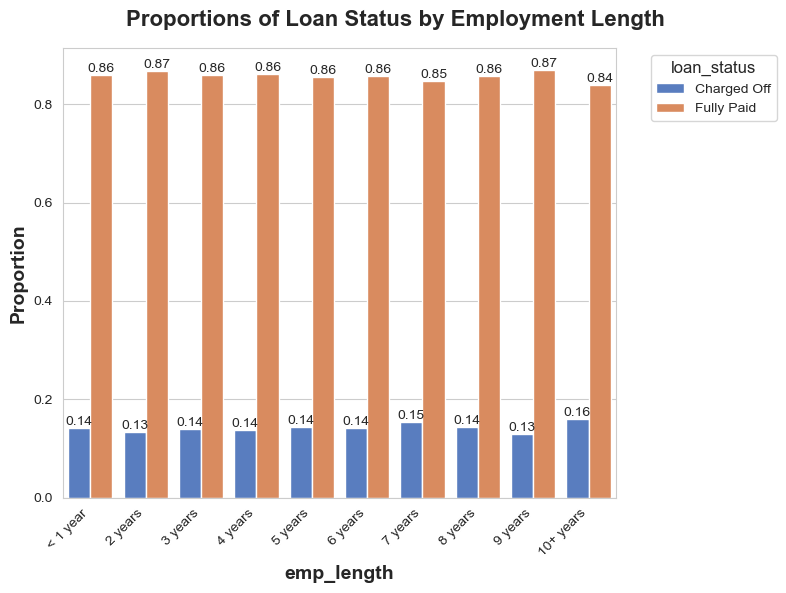

In [73]:
proportions = calculate_proportions(loan_df, 'emp_length', 'loan_status')
plot_proportions(proportions, 'emp_length', 'loan_status', 'Proportions of Loan Status by Employment Length', rotate=True)

- ***Verification Status by Loan Status***

The relative frequency of each loan_status within each verification_status
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                0.13        0.87
Source Verified             0.15        0.85
Verified                    0.17        0.83


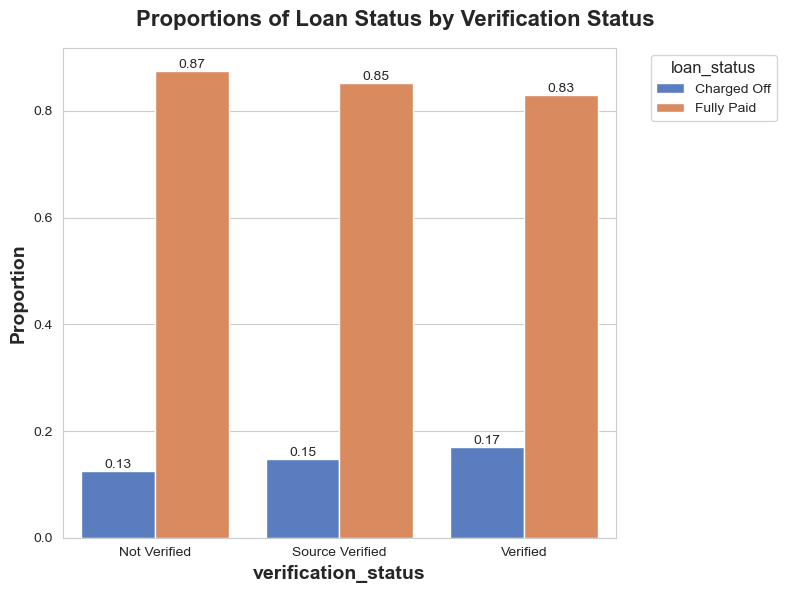

In [74]:
proportions = calculate_proportions(loan_df, 'verification_status', 'loan_status')
plot_proportions(proportions, 'verification_status', 'loan_status', 'Proportions of Loan Status by Verification Status')

- ***Purpose by Loan Status***

The relative frequency of each loan_status within each purpose
loan_status         Charged Off  Fully Paid
purpose                                    
car                        0.11        0.89
credit_card                0.10        0.90
debt_consolidation         0.15        0.85
educational                0.17        0.83
home_improvement           0.12        0.88
house                      0.17        0.83
major_purchase             0.10        0.90
medical                    0.16        0.84
moving                     0.16        0.84
other                      0.16        0.84
renewable_energy           0.20        0.80
small_business             0.28        0.72
vacation                   0.14        0.86
wedding                    0.10        0.90


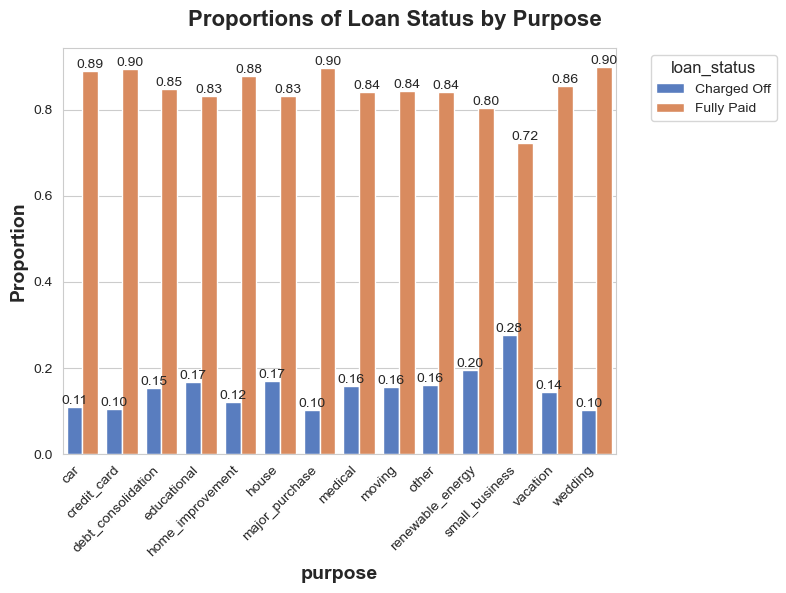

In [75]:
proportions = calculate_proportions(loan_df, 'purpose', 'loan_status')
plot_proportions(proportions, 'purpose', 'loan_status', 'Proportions of Loan Status by Purpose', rotate=True)

- ***Term by Loan Status***

The relative frequency of each loan_status within each term
loan_status  Charged Off  Fully Paid
term                                
36                  0.11        0.89
60                  0.26        0.74


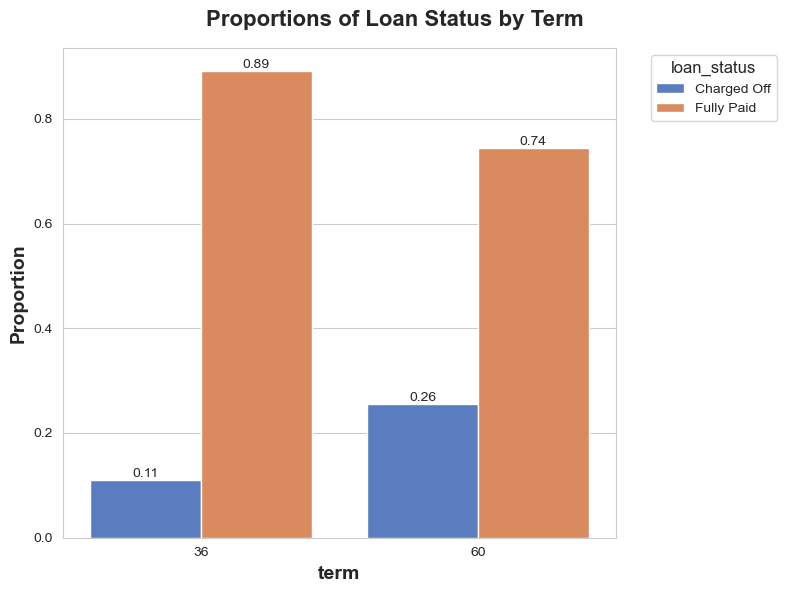

In [76]:
proportions = calculate_proportions(loan_df, 'term', 'loan_status')
plot_proportions(proportions, 'term', 'loan_status', 'Proportions of Loan Status by Term')

- ***Delinqent by Loan Status***

The relative frequency of each loan_status within each delinq_2yrs
loan_status  Charged Off  Fully Paid
delinq_2yrs                         
0                   0.14        0.86
1                   0.16        0.84
2                   0.19        0.81
3                   0.16        0.84
4                   0.23        0.77
5                   0.11        0.89
6                   0.10        0.90
7                   0.25        0.75
8                   0.50        0.50
9                   0.00        1.00
11                  0.00        1.00


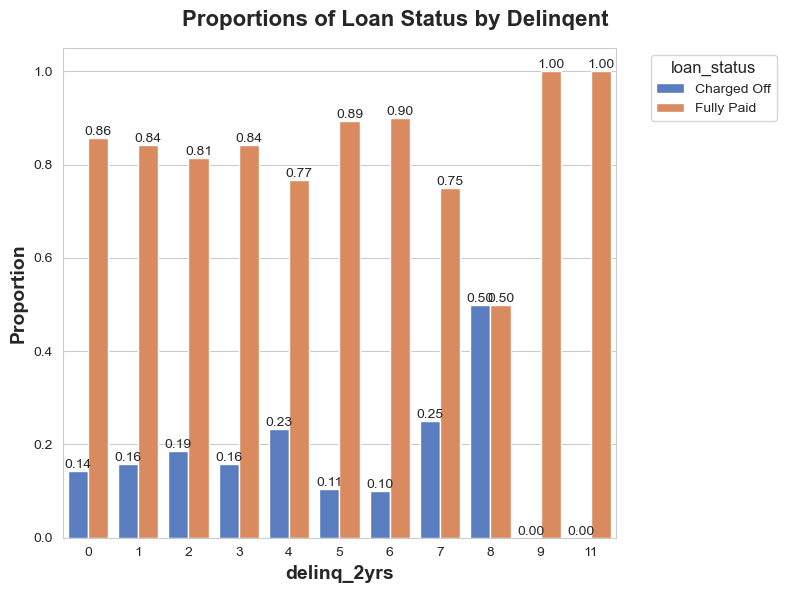

In [77]:
proportions = calculate_proportions(loan_df, 'delinq_2yrs', 'loan_status')
plot_proportions(proportions, 'delinq_2yrs', 'loan_status', 'Proportions of Loan Status by Delinqent')

- ***Public Records by loan status***

The relative frequency of each loan_status within each pub_rec
loan_status  Charged Off  Fully Paid
pub_rec                             
0                   0.14        0.86
1                   0.22        0.78
2                   0.23        0.77
3                   0.00        1.00
4                   0.00        1.00


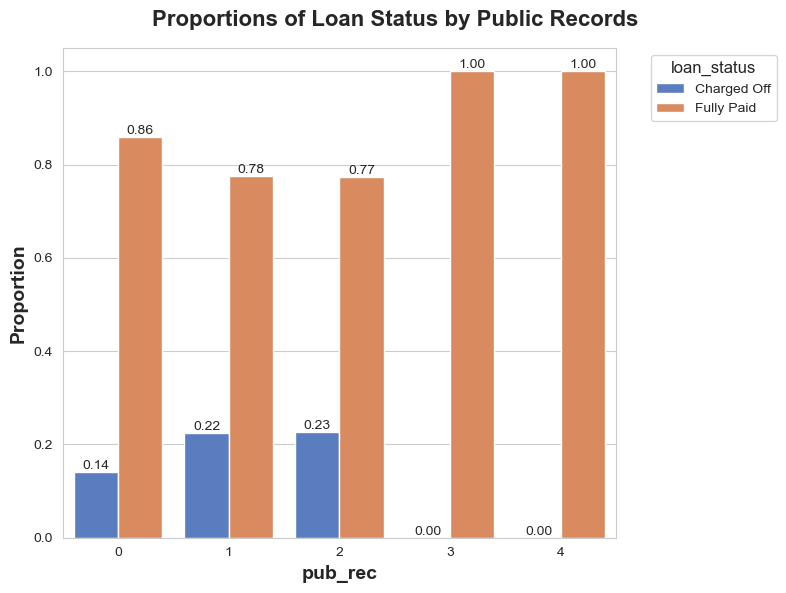

In [78]:
proportions = calculate_proportions(loan_df, 'pub_rec', 'loan_status')
plot_proportions(proportions, 'pub_rec', 'loan_status', 'Proportions of Loan Status by Public Records')

- ***Inquiries by loan status***

The relative frequency of each loan_status within each inq_last_6mths
loan_status     Charged Off  Fully Paid
inq_last_6mths                         
0                      0.12        0.88
1                      0.16        0.84
2                      0.17        0.83
3                      0.21        0.79
4                      0.16        0.84
5                      0.19        0.81
6                      0.25        0.75
7                      0.30        0.70
8                      0.25        0.75


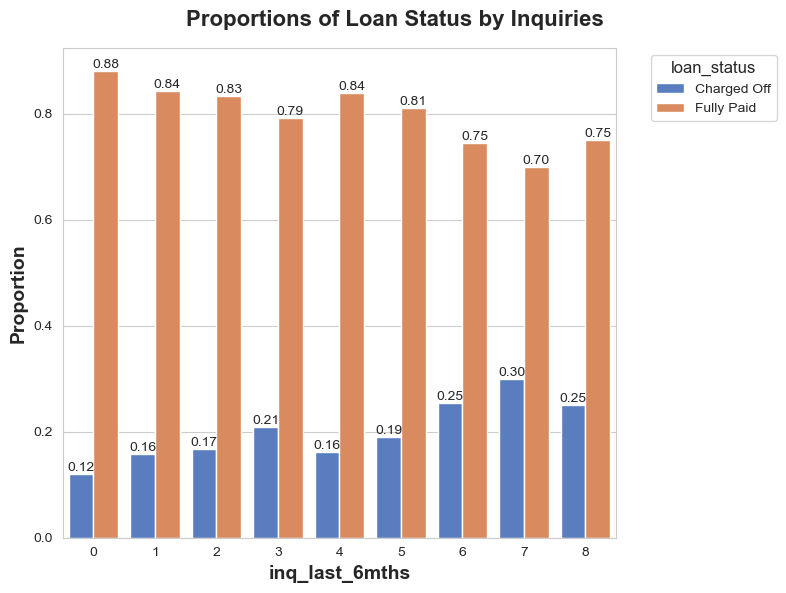

In [79]:
proportions = calculate_proportions(loan_df, 'inq_last_6mths', 'loan_status')
plot_proportions(proportions, 'inq_last_6mths', 'loan_status', 'Proportions of Loan Status by Inquiries')

- ***Region by loan status***

The relative frequency of each loan_status within each region
loan_status  Charged Off  Fully Paid
region                              
Midwest             0.14        0.86
Northeast           0.13        0.87
South               0.15        0.85
West                0.16        0.84


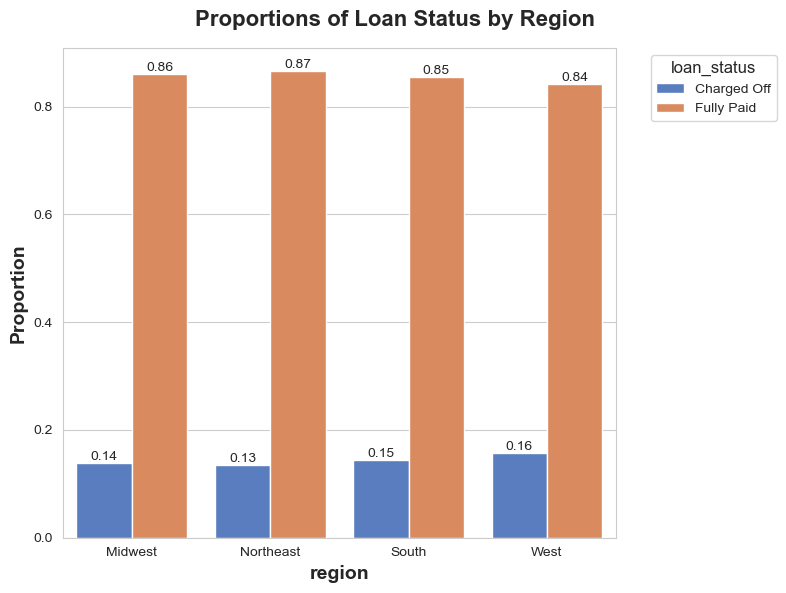

In [80]:
proportions = calculate_proportions(loan_df, 'region', 'loan_status')
plot_proportions(proportions, 'region', 'loan_status', 'Proportions of Loan Status by Region')

In [81]:
def plot_hist_proportion(data, column, bins_column, hue_column, title):
    """
    Plots the distribution of a specified column by a hue column using a KDE plot with histogram and a proportion plot.

    Parameters:
    - data: pd.DataFrame, the DataFrame containing the data
    - column: str, the name of the column to visualize
    - hue_column: str, the name of the hue column
    - bins_column: str, the name of the binned column
    """
    
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Formatting Figure
    fig.suptitle(title, fontsize=16, fontweight='bold')
    fig.patch.set_facecolor('#f5f5f5')  # Background color for the figure

    # First subplot: KDE plot with histogram
    sns.histplot(data=data, x=column, hue=hue_column, bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column} by {hue_column} (KDE)', fontsize=16, fontweight='bold')
    axes[0].set_xlabel(column, fontsize=14)
    axes[0].set_ylabel('Density', fontsize=14)

    # Calculate proportions
    count_data = data.groupby([bins_column, hue_column]).size().unstack().fillna(0)
    proportion_data = count_data.div(count_data.sum(axis=1), axis=0).reset_index().melt(id_vars=bins_column, value_name='Proportion')

    
    # Second subplot: Proportion plot with hue
    # Calculate proportions
    count_data = data[bins_column].value_counts(normalize=True).reset_index()
    count_data.columns = [bins_column, 'Proportion']
    
    sns.barplot(x=bins_column, y='Proportion', hue=hue_column, data=proportion_data, palette='muted', ax=axes[1])
    axes[1].set_title(f'Proportion of {column} by {hue_column}', fontsize=16, fontweight='bold', color='navy')
    axes[1].set_xlabel(column, fontsize=14, color='darkred')
    axes[1].set_ylabel('Proportion', fontsize=14, color='darkred')


    # Add annotations
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, color='black')

    # Place the legend outside the plot
    axes[1].legend(title=hue_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    # Adjust layout
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

- ***Loan Amount by Loan Status***

The relative frequency of each loan_status within each loan_amnt_scale
loan_status      Charged Off  Fully Paid
loan_amnt_scale                         
0-10k                   0.13        0.87
10k-20k                 0.15        0.85
20k-30k                 0.20        0.80
30k-40k                 0.28        0.72


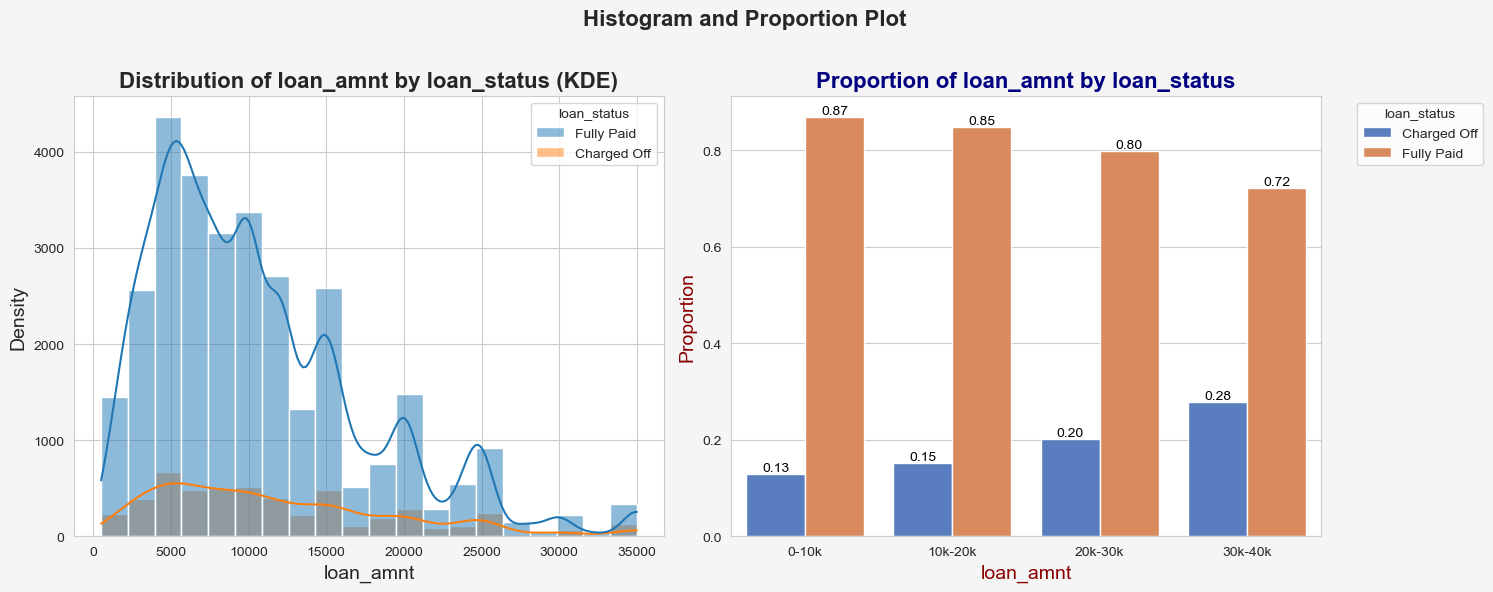

In [82]:
calculate_proportions(loan_df, 'loan_amnt_scale', 'loan_status')
plot_hist_proportion(loan_df, 'loan_amnt', 'loan_amnt_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Funded Amount by Loan Status***

The relative frequency of each loan_status within each funded_amnt_scale
loan_status        Charged Off  Fully Paid
funded_amnt_scale                         
0-10k                     0.13        0.87
10k-20k                   0.15        0.85
20k-30k                   0.20        0.80
30k-40k                   0.28        0.72


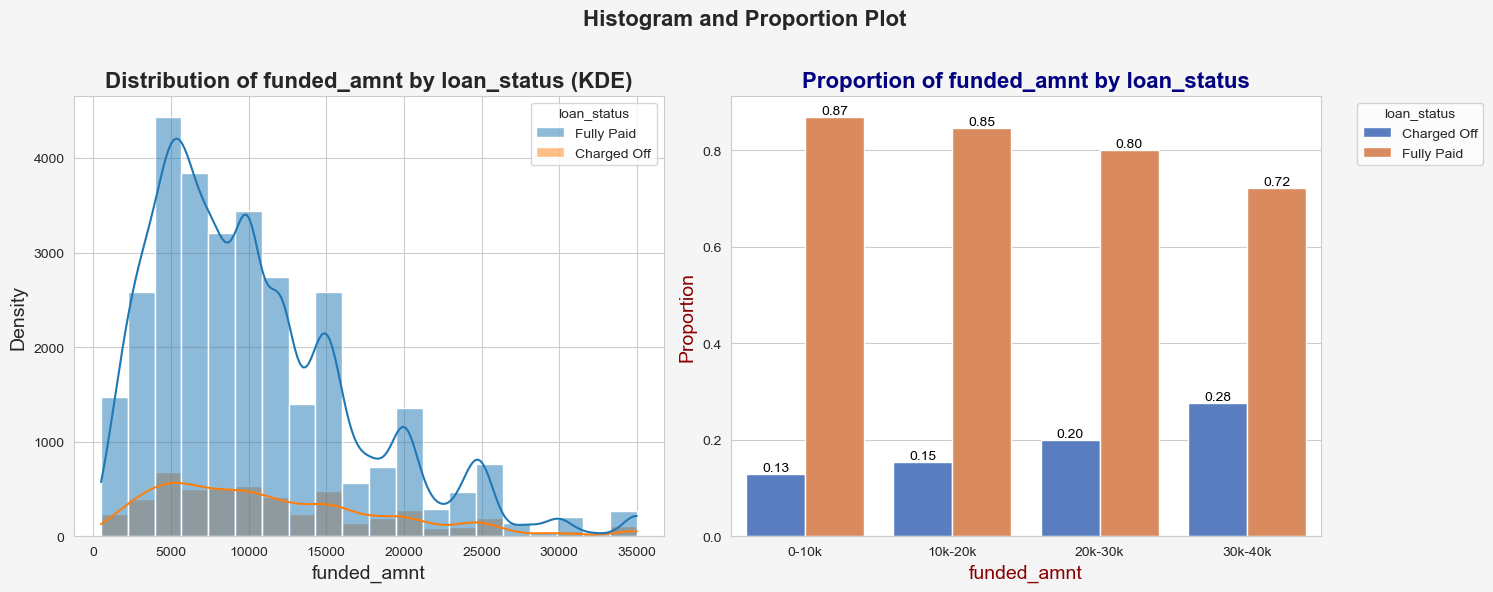

In [83]:
calculate_proportions(loan_df, 'funded_amnt_scale', 'loan_status')
plot_hist_proportion(loan_df, 'funded_amnt', 'funded_amnt_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Installment by Loan Status***

The relative frequency of each loan_status within each installment_scale
loan_status        Charged Off  Fully Paid
installment_scale                         
0-300                     0.14        0.86
300-600                   0.15        0.85
600-900                   0.17        0.83
900-1300                  0.21        0.79


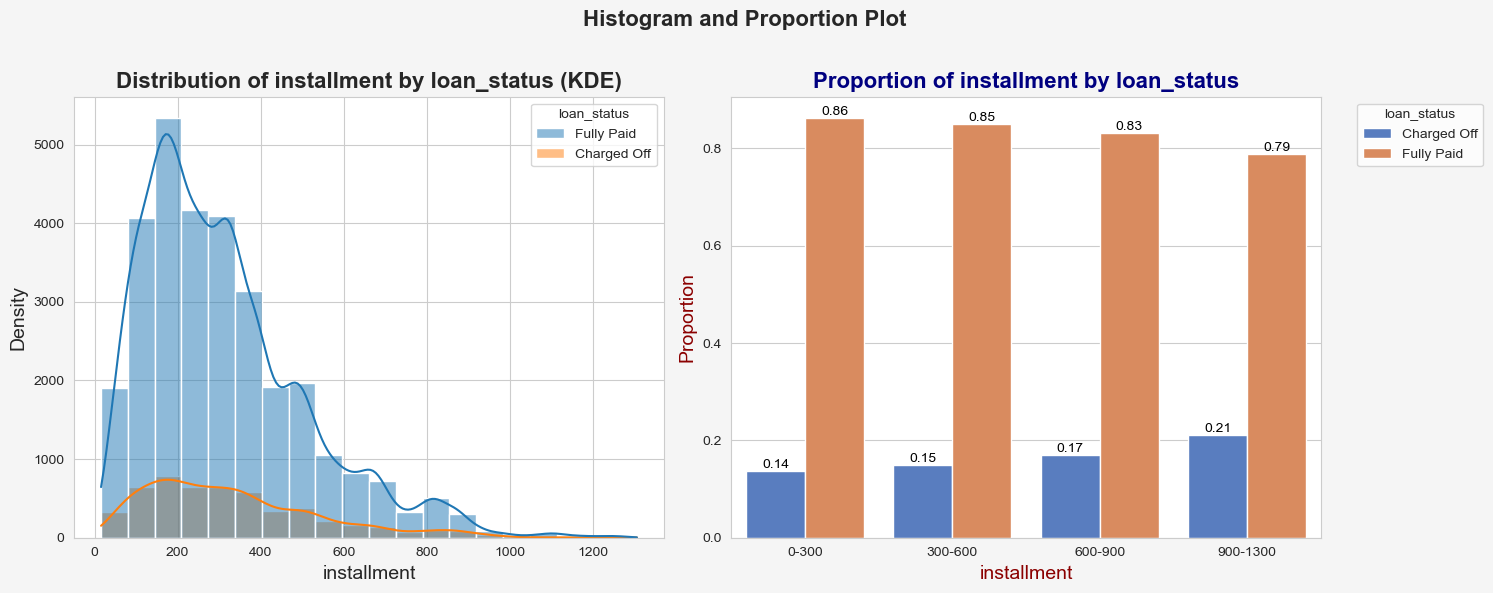

In [84]:
calculate_proportions(loan_df, 'installment_scale', 'loan_status')
plot_hist_proportion(loan_df, 'installment', 'installment_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Annual Income by Loan Status***

The relative frequency of each loan_status within each annual_income_scale
loan_status          Charged Off  Fully Paid
annual_income_scale                         
1k-30k                      0.18        0.82
30k-60k                     0.16        0.84
60k-90k                     0.13        0.87
90k-120k                    0.11        0.89
120k-150k                   0.11        0.89


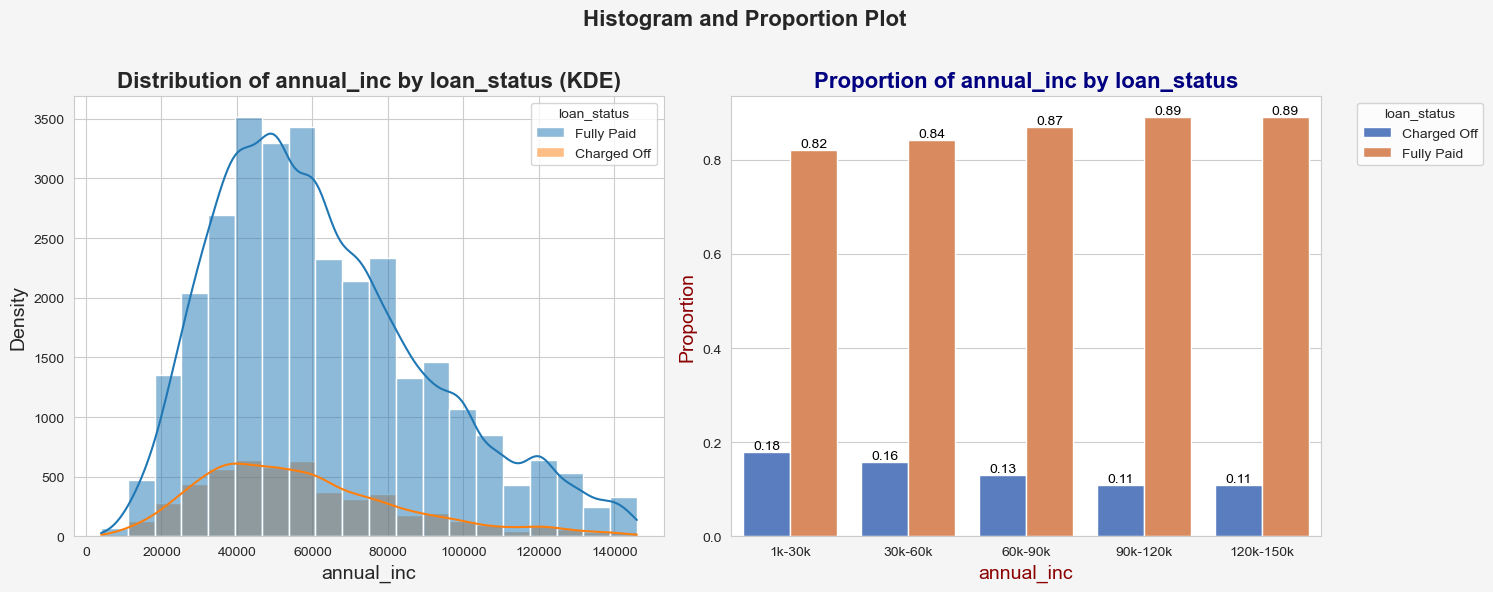

In [85]:
calculate_proportions(loan_df, 'annual_income_scale', 'loan_status')
plot_hist_proportion(loan_df, 'annual_inc', 'annual_income_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Interest Rate by Loan Status***

The relative frequency of each loan_status within each interest_rate_scale
loan_status          Charged Off  Fully Paid
interest_rate_scale                         
5%-10%                      0.07        0.93
10%-15%                     0.15        0.85
15%-20%                     0.25        0.75
20%-25%                     0.39        0.61


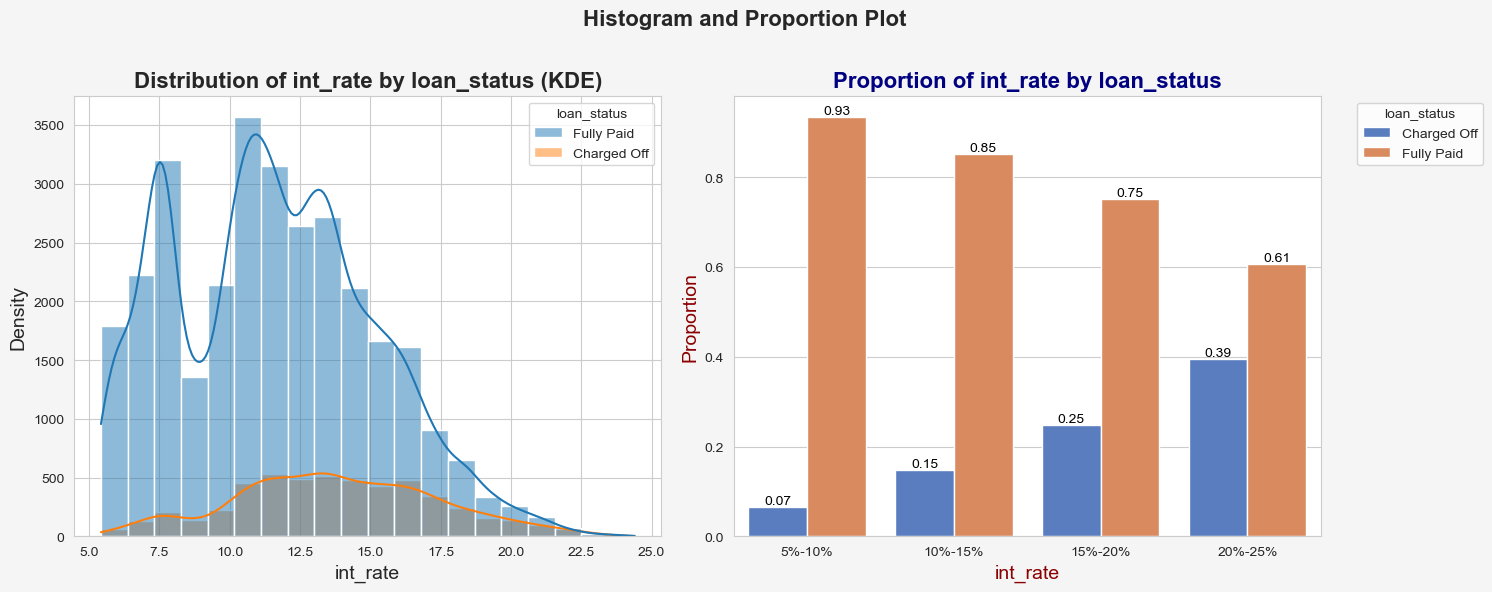

In [86]:
calculate_proportions(loan_df, 'interest_rate_scale', 'loan_status')
plot_hist_proportion(loan_df, 'int_rate', 'interest_rate_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Debt-to-Income-Ratio by Loan Status***

The relative frequency of each loan_status within each dti_scale
loan_status  Charged Off  Fully Paid
dti_scale                           
0-5                 0.12        0.88
5-10                0.13        0.87
10-15               0.14        0.86
15-20               0.16        0.84
20-25               0.17        0.83
25-30               0.13        0.87


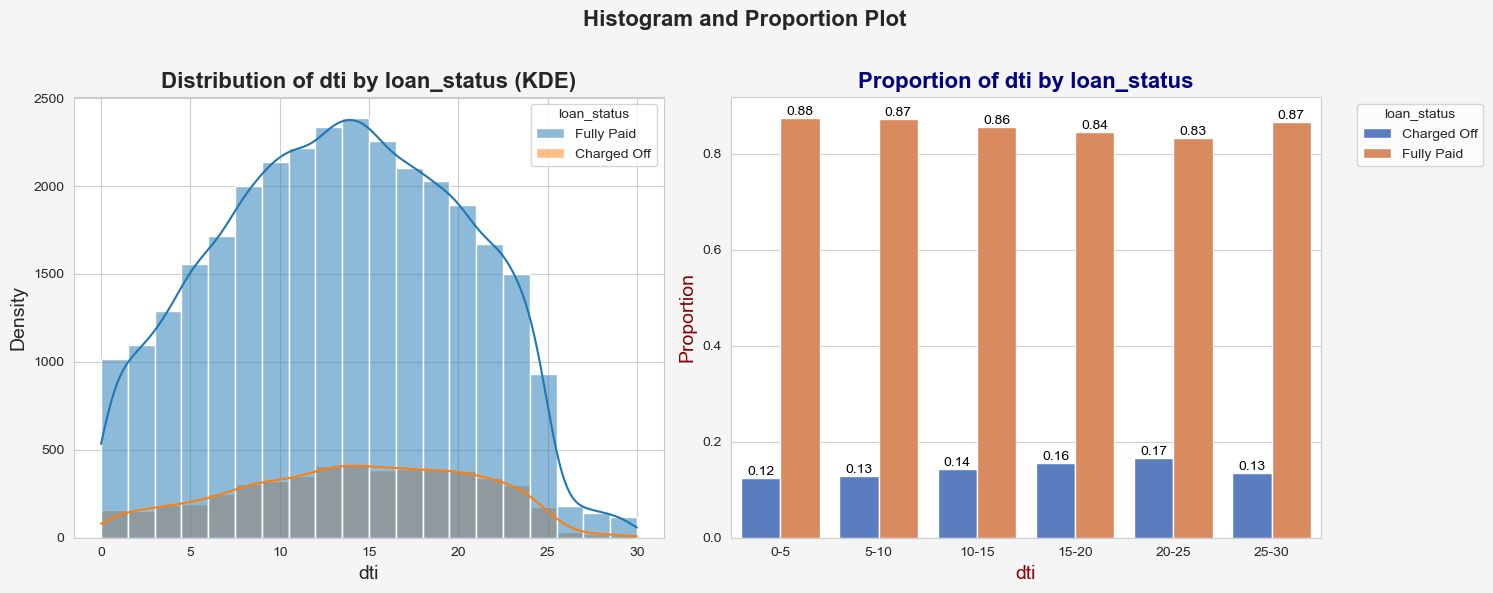

In [87]:
calculate_proportions(loan_df, 'dti_scale', 'loan_status')
plot_hist_proportion(loan_df, 'dti', 'dti_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Open Account by Loan Status***

The relative frequency of each loan_status within each open_accounts_scale
loan_status          Charged Off  Fully Paid
open_accounts_scale                         
0-10                        0.15        0.85
10-20                       0.14        0.86
20-30                       0.16        0.84
30-40                       0.29        0.71
40-50                       0.00        1.00


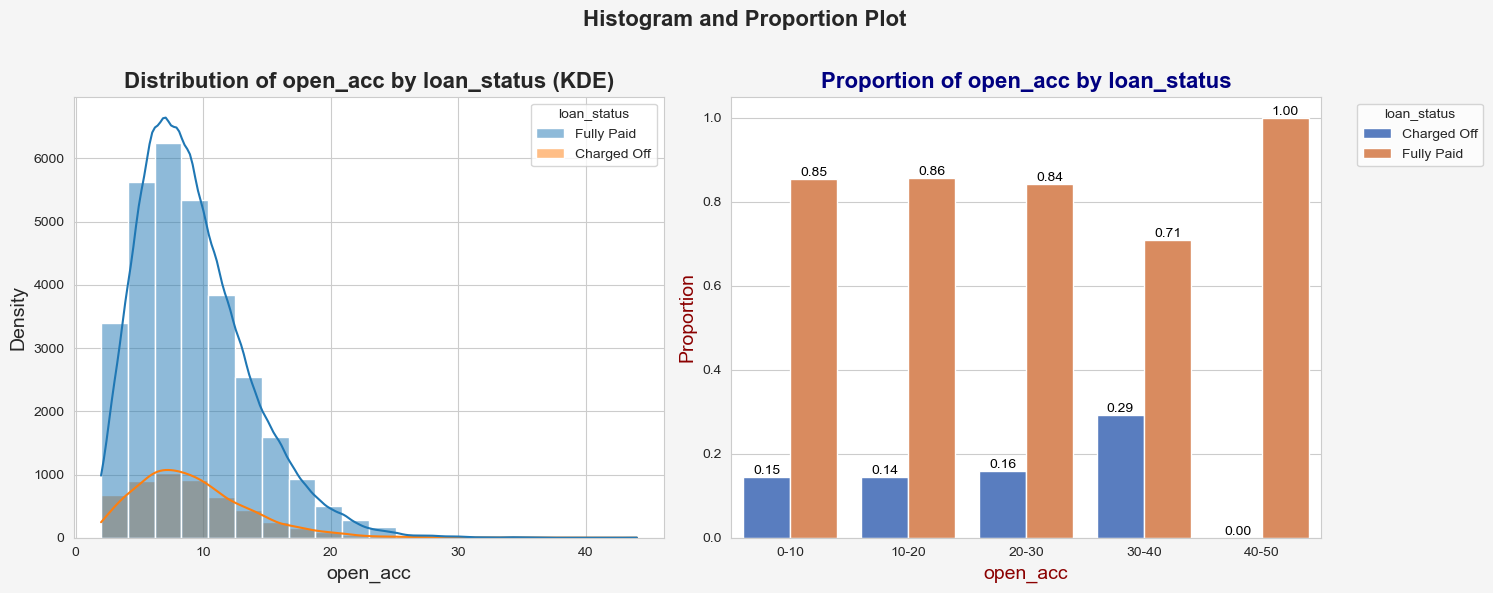

In [88]:
calculate_proportions(loan_df, 'open_accounts_scale', 'loan_status')
plot_hist_proportion(loan_df, 'open_acc', 'open_accounts_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Total Account by Loan Status***

The relative frequency of each loan_status within each total_accounts_scale
loan_status           Charged Off  Fully Paid
total_accounts_scale                         
0-15                         0.16        0.84
15-30                        0.14        0.86
30-45                        0.15        0.85
45-60                        0.12        0.88
60-75                        0.14        0.86
75-90                        0.00        1.00


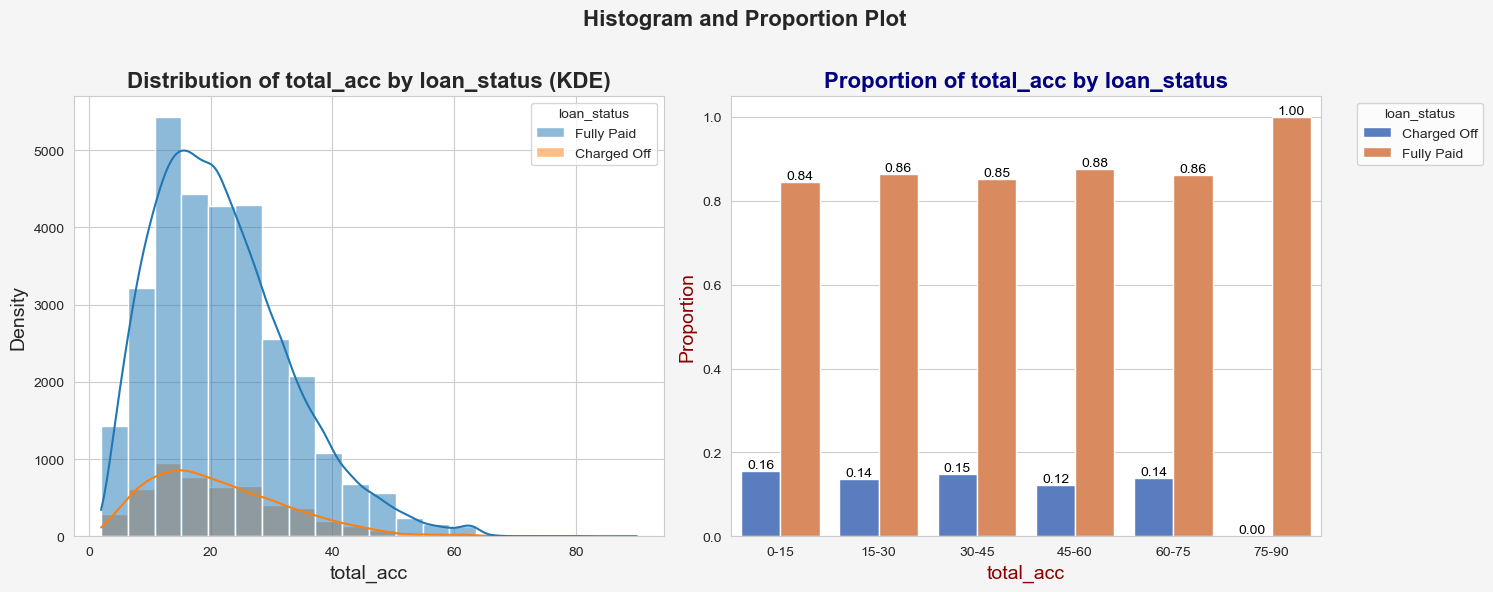

In [89]:
calculate_proportions(loan_df, 'total_accounts_scale', 'loan_status')
plot_hist_proportion(loan_df, 'total_acc', 'total_accounts_scale', 'loan_status', 'Histogram and Proportion Plot')

- ***Revolving Utilization by Loan Status***

The relative frequency of each loan_status within each revolving_utilization_scale
loan_status                  Charged Off  Fully Paid
revolving_utilization_scale                         
0-20                                0.09        0.91
20-40                               0.12        0.88
40-60                               0.14        0.86
60-80                               0.17        0.83
80-100                              0.20        0.80


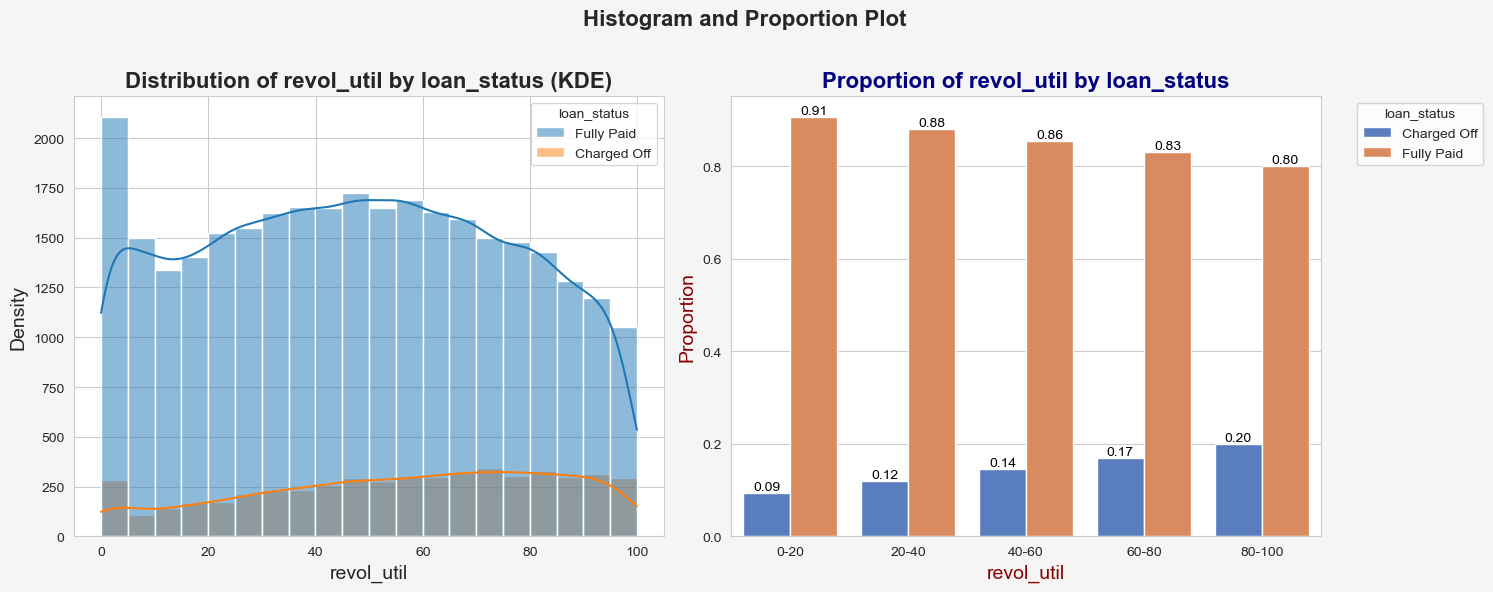

In [90]:
calculate_proportions(loan_df, 'revolving_utilization_scale', 'loan_status')
plot_hist_proportion(loan_df, 'revol_util', 'revolving_utilization_scale', 'loan_status', 'Histogram and Proportion Plot')

## 4.3 Bivariate Analysis

- ***Interest vs other Variables***

In [91]:
def plot_int_rate_vs_multiple_variables(data, variables, hue_var, title='Interest Rate vs Multiple Variables'):
    """
    Plots a 2x2 grid of line plots for interest rate against multiple variables.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    variables (list): List of variables to plot against interest rate.
    hue_var (str): The variable to use for hue in the plots.
    title (str): The title for the entire plot grid.
    """
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Formatting Figure
    fig.suptitle(title, fontsize=20, fontweight='bold')

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through the variables and create the line plots
    for ax, var in zip(axes, variables):
        sns.lineplot(ax=ax, x=var, y='int_rate', data=data, marker='o', hue=hue_var, palette='muted')
        #ax.set_title(f'Interest Rate vs {var}', fontsize=16)
        ax.set_xlabel(var, fontsize=14, fontweight='bold')
        ax.set_ylabel('Interest Rate', fontsize=14, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the title
    plt.show()

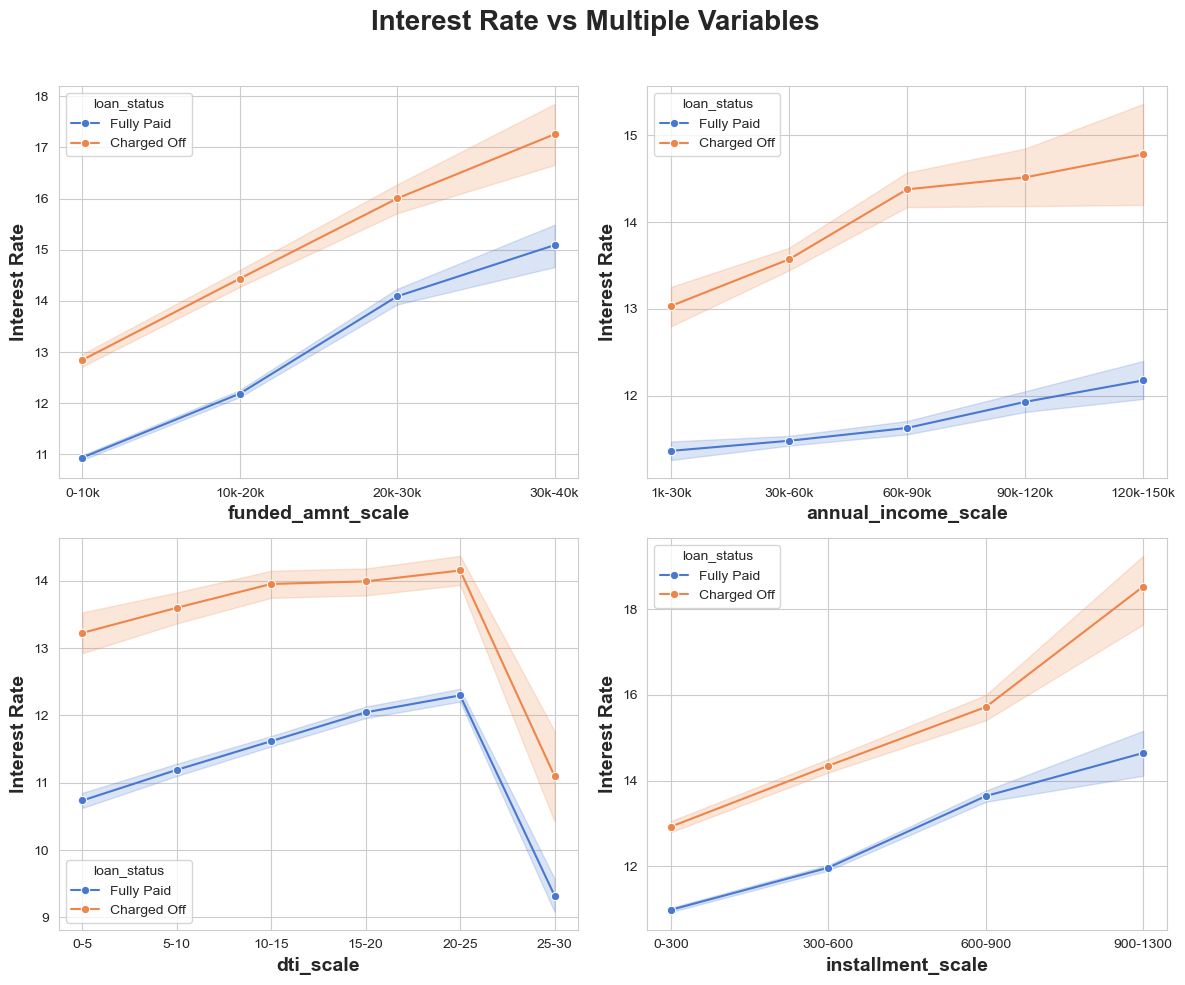

In [92]:
columns = ['funded_amnt_scale', 'annual_income_scale', 'dti_scale', 'installment_scale']
plot_int_rate_vs_multiple_variables(loan_df, columns, hue_var='loan_status')

In [93]:
def analyze_credit_loss(loan_df, columns, title, rotate=True):
    """
    Analyzes credit loss across different features.
    
    Parameters:
        loan_df (pd.DataFrame): The DataFrame containing the loan data.
        columns (list): List of four categorical features to group by and analyze.
        funded_amnt_col (str): The column name for the funded amount.
        total_pymnt_col (str): The column name for the total payment received.
        title (str): The title of the plot.
        rotate (bool): Whether to rotate the x-axis labels.
        
    Returns:
        None
    """
    
    if len(columns) != 4:
        raise ValueError("Exactly 4 columns must be specified.")

    # Calculate credit loss for each loan
    charged_off_loans = loan_df[loan_df['loan_status'] == 'Charged Off'].copy()
    charged_off_loans['credit_loss'] = charged_off_loans['funded_amnt'] - charged_off_loans['total_pymnt']

    # Setting up the subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
    
    # Formatting Figure
    fig.suptitle(title, fontsize=20, fontweight='bold')
   
    
    for ax, group_by_feature in zip(axes.flat, columns):
        # Summarize the credit loss by the specified feature
        summary = charged_off_loans.groupby(group_by_feature)['credit_loss'].sum().reset_index()
        summary = summary.sort_values(by='credit_loss', ascending=False)

        # Create the plot
        sns.barplot(x=group_by_feature, y='credit_loss', data=summary, palette='muted', ax=ax)
        ax.set_xlabel(group_by_feature.capitalize(), fontsize=14, fontweight='bold')
        ax.set_ylabel('Total Credit Loss', fontsize=14, fontweight='bold')

        if rotate:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)
        ax.set_yticklabels(ax.get_xticklabels(), fontsize=14)
        # Format y-axis labels
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x * 1e-3)}K'))

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

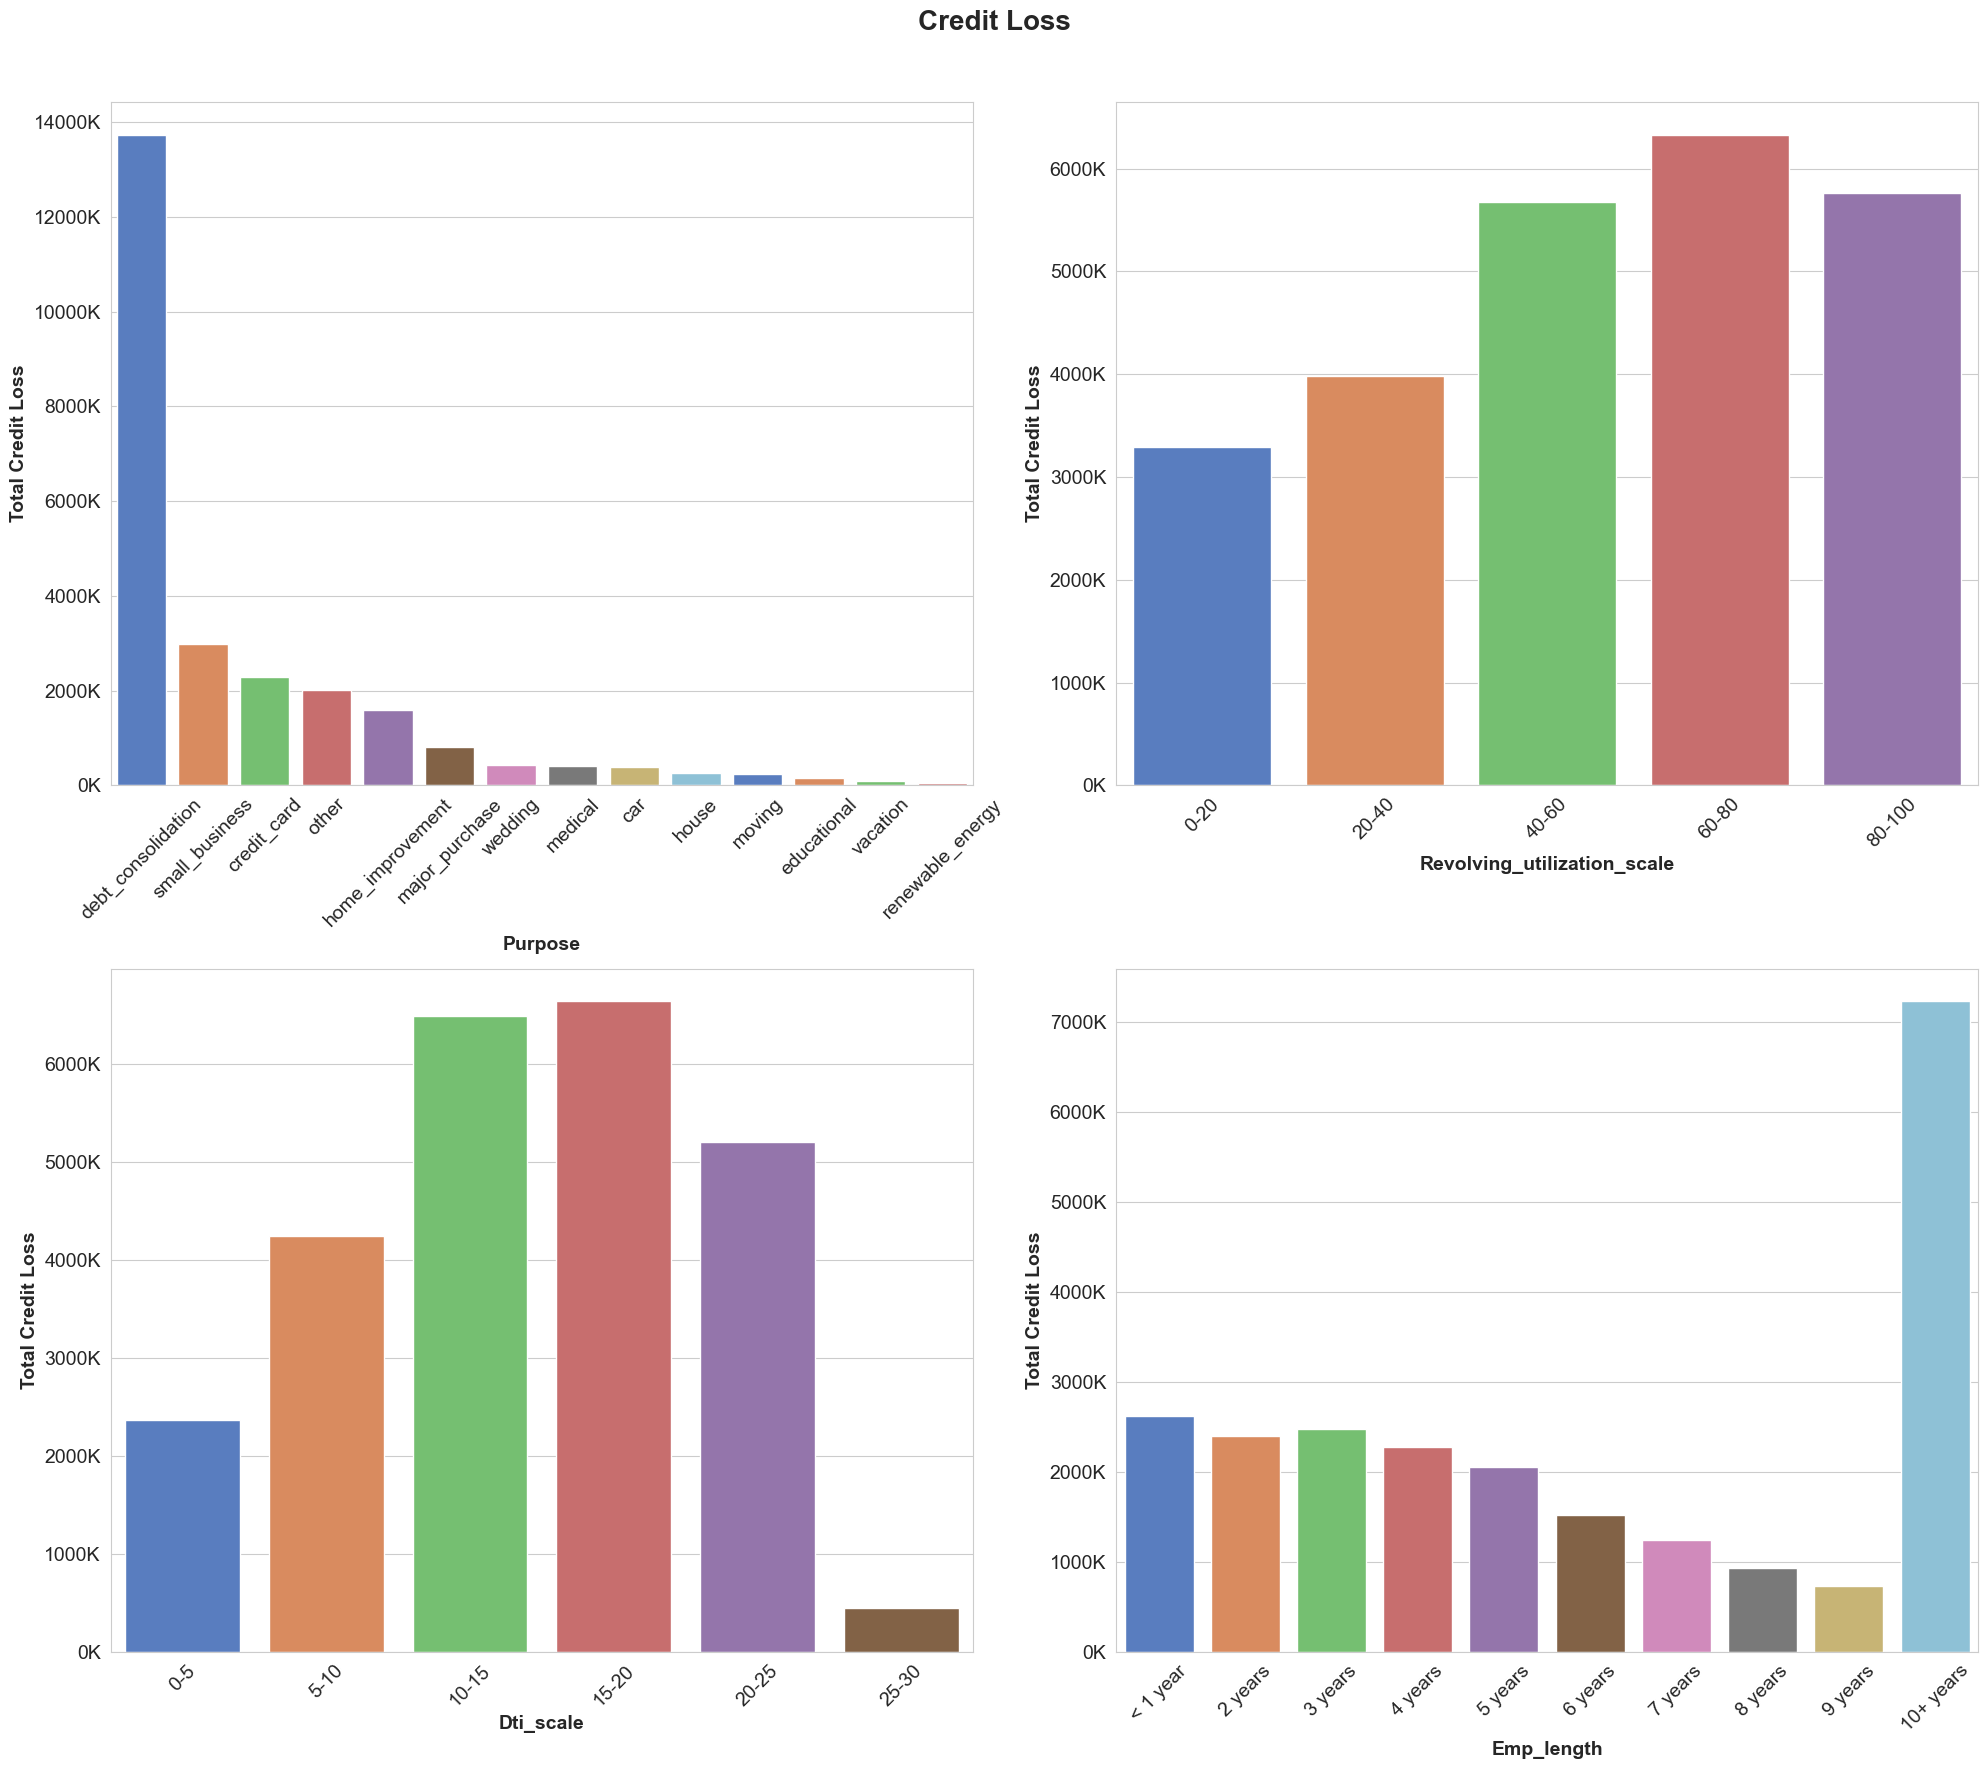

In [94]:
columns = ['purpose', 'revolving_utilization_scale', 'dti_scale', 'emp_length']
analyze_credit_loss(loan_df, columns, 'Credit Loss')

## 4.3 Multivariate Analysis


### Correlation
Correlation Matrix-Quantitative Variables

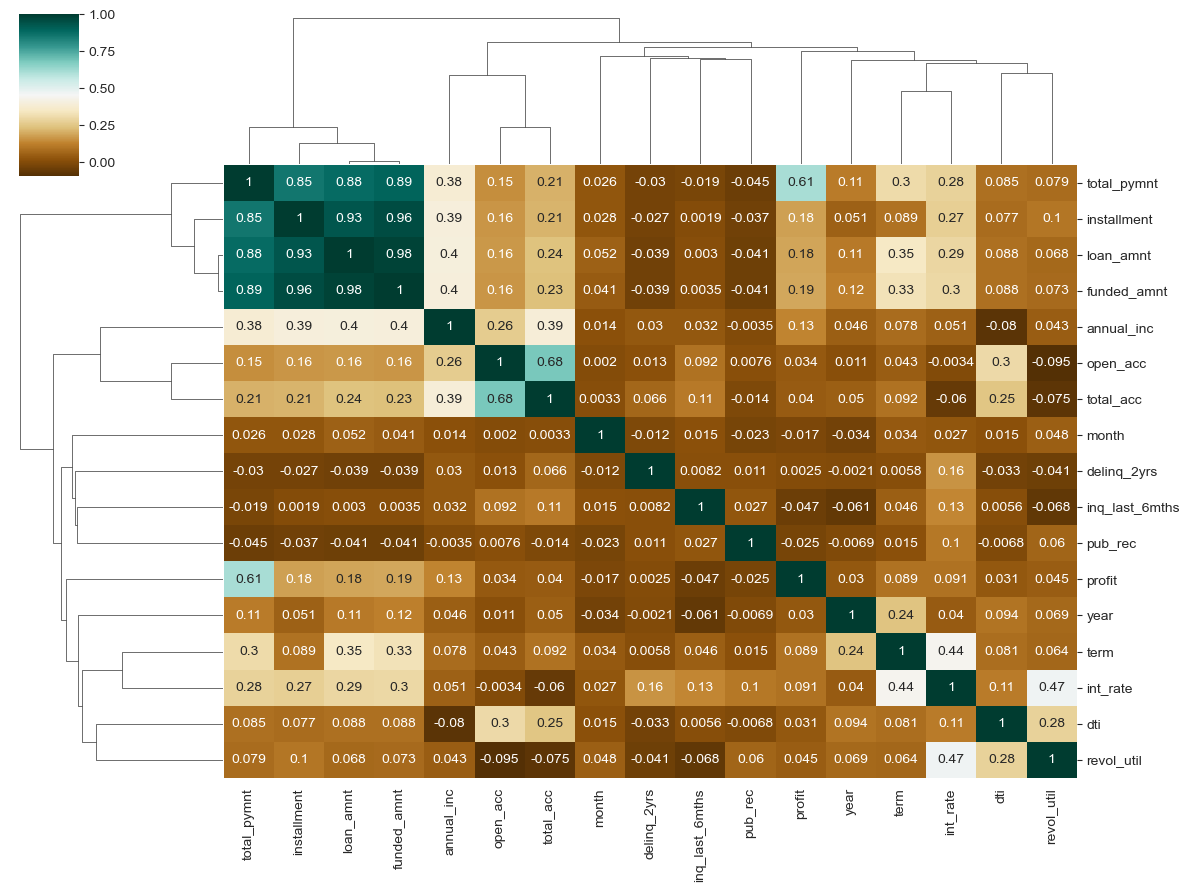

In [95]:
numerical_loan_df = loan_df.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_loan_df.corr()
sns.clustermap(corr_matrix, annot=True, figsize=(12,9), cmap='BrBG')
plt.show()

### Pair Plot

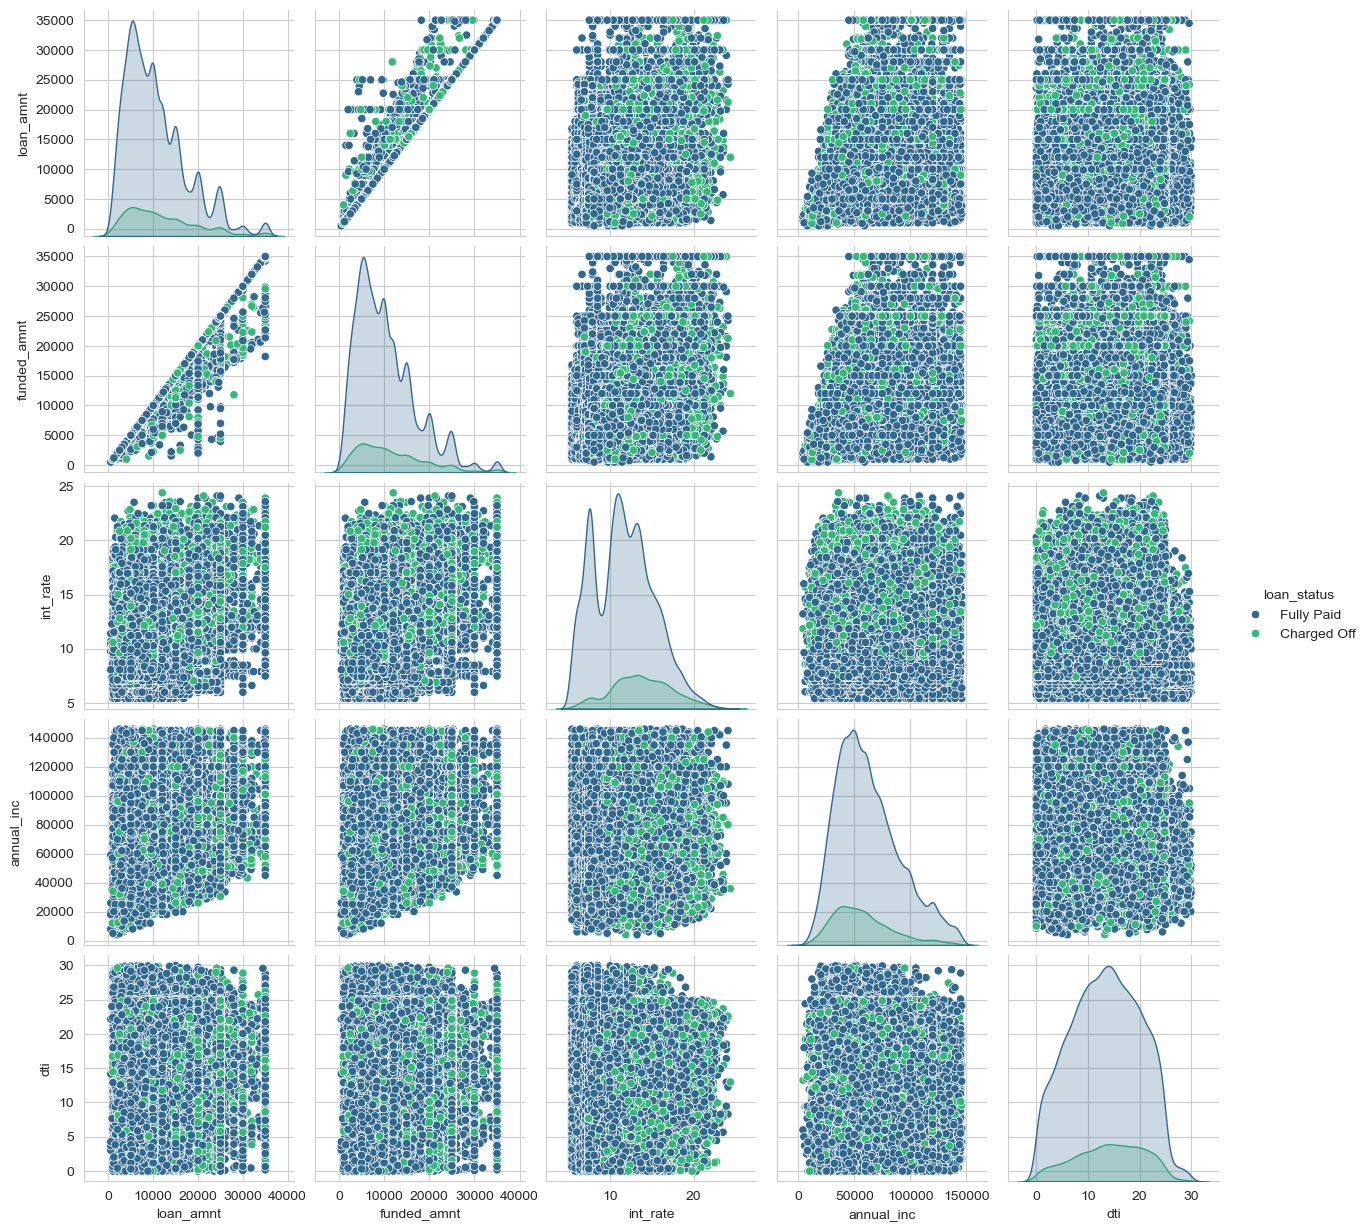

In [96]:
# Select a subset of columns to visualize in the pairplot for better clarity
selected_columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']

# Create a pairplot
sns.pairplot(loan_df[selected_columns], hue='loan_status', palette='viridis')

# Show the plot
plt.show()

## 4.4 Statistical Analysis

In [97]:
def summarize_loan_data_with_profit(loan_df, group_column, funded_amnt_col='funded_amnt', total_pymnt_col='total_pymnt'):
    """
    Summarizes loan data with count, % charged off, % fully paid, credit loss, and profit %.
    
    Parameters:
        loan_df (pd.DataFrame): The DataFrame containing the loan data.
        group_column (str): The column to group by and analyze.
        funded_amnt_col (str): The column name for the funded amount.
        total_pymnt_col (str): The column name for the total payment.
        
    Returns:
        pd.DataFrame: The summarized loan data.
    """
    
    # Calculate counts
    counts = loan_df.groupby([group_column, 'loan_status']).size().unstack().fillna(0)
    
    # Calculate proportions
    proportions = counts.div(counts.sum(axis=1), axis=0)
    
    # Get total counts for each group
    total_counts = counts.sum(axis=1).reset_index(name='count')
    
    # Get proportions for charged off and fully paid
    charged_off_proportion = proportions.get('Charged Off', pd.Series(0, index=proportions.index)).reset_index(name='% Charged Off')
    fully_paid_proportion = proportions.get('Fully Paid', pd.Series(0, index=proportions.index)).reset_index(name='% Fully Paid')
    
    # Calculate total credit loss for each group
    charged_off_loans = loan_df[loan_df['loan_status'] == 'Charged Off']
    charged_off_loans['credit_loss'] = charged_off_loans[funded_amnt_col] - charged_off_loans[total_pymnt_col]
    total_credit_loss = charged_off_loans.groupby(group_column)['credit_loss'].sum().reset_index(name='credit_loss')
    
    # Merge the results
    summary = total_counts.merge(charged_off_proportion, on=group_column)
    summary = summary.merge(fully_paid_proportion, on=group_column)
    summary = summary.merge(total_credit_loss, on=group_column)
    summary.reset_index(drop=True, inplace=True)

    return summary

In [100]:
columns = ['term', 'grade','emp_length', 'home_ownership',
       'verification_status', 'purpose', 'delinq_2yrs', 'pub_rec', 'year', 'month',
       'region', 'interest_rate_scale', 'revolving_utilization_scale',
       'dti_scale', 'funded_amnt_scale', 'loan_amnt_scale',
       'open_accounts_scale', 'total_accounts_scale', 'annual_income_scale',
       'installment_scale', 'inq_last_6mths']

In [101]:
for column in columns:
    print(f'\nStatistical Summary: {column}\n')
    print(summarize_loan_data_with_profit(loan_df, column))


Statistical Summary: term

   term  count  % Charged Off  % Fully Paid  credit_loss
0    36  27010           0.11          0.89  11580691.57
1    60   8758           0.26          0.74  13893133.88

Statistical Summary: grade

  grade  count  % Charged Off  % Fully Paid  credit_loss
0     A   9309           0.06          0.94   1790962.01
1     B  10841           0.12          0.88   5957216.41
2     C   7333           0.17          0.83   5942483.99
3     D   4740           0.22          0.78   5242978.16
4     E   2413           0.27          0.73   3856164.64
5     F    868           0.32          0.68   1897040.46
6     G    264           0.35          0.65    786979.78

Statistical Summary: emp_length

  emp_length  count  % Charged Off  % Fully Paid  credit_loss
0   < 1 year   4340           0.14          0.86   2623211.08
1    2 years   4115           0.13          0.87   2396975.66
2    3 years   3838           0.14          0.86   2481787.53
3    4 years   3207           0.14

## Conclusions
***Note: Conclusions are ordered based on their weightage and how strognly they contributed to the analysis.***
1. **Purpose:** The purpose of loans taken for _small_business_ and _renewable_energy_ are more risky. Default rates are **28%** and **20%** respectively. While the other purposes are relatively less risky, we observed more credit loss for _debt_consolidation_ purpose which is ~ 14M because volume is high in this purpose.
2. **Revolving Utilization:** Higher utilization rates correlate with higher default rates. The highest charged-off rate in this segment is **20%** for the customers who utilize their available credit 80%-100%. Credit loses are also proportional to the utilization rates.
3. **DTI (Debt-to-Income):** Higher DTI ratios lead to higher default rates. Charged-off rate increases starting from 13% to 17%. Higher DTI ratios lead to higher charged-off rates and increased credit losses.
4. **Annual Income:** Higher income correlates with lower default rates. Charge-off rate decreases from 18% (1k-30k) to 11% (90k-150k). Credit loss is highest for income range 30k-60k ~ $11M.
5. **Loan Amount:** Larger loan amounts correlate with higher default rates. Charge-off rates rising from 13% for loan amount between 0-10k to 28% for loan amount between 30k-40k.
6. **Home Ownership:** Category OTHER has higher default rate 19%.
7. **Employment Length:** Default rate almost same across all levels approximately ~15%. Out of all 10+ years people are defaulting slightly more than others with 16%. But, there is huge credit loss in this category though the difference is just 1% because of volume.
8. **Verification Status** Even verified customers are more likely to default at the rate of 17% and credit loss is ~ 12.5M.
9. **Term:** 60 months loan term has more default rate compared to 36 months. Charged-off percentage is 26% for 60 months and 11% for 36 months.
10. **Grade:** Lower loan **grade**s have higher default rate. The risk level increases from grade A(6%) to grade G(35%).
11. **Installment:** Higher monthly installments correlate with higher default rates. Charged-off rate increases from 14% (0-300) to 21% (900-1300).
12. **Funded Amount:** Larger funded amounts correspond to higher default rates. The charged-off rate increases from 13% (for amounts between 0-10k) to 28% (for amounts between 30k-40k).
13. **Interest Rate:** Interest rate is positively correlated with default rate. Charged-off rate is 7% for 5-10% and 39% for 20-25%.
14. **Total Accounts:** Total accounts show stable default rates with slight variations. Charge-off rate is relatively stable around 14-15% across most ranges.
15. **Public Records:** People with derogatory/bankruptcy history are more likely to default. But, loans offered to such customers is also very less.